In [92]:
# CARREGANDO BIBLIOTECAS
from pymongo import MongoClient
import pandas as pd
import os
import shutil
from math import *
import numpy as np

import networkx as nx
from collections import Counter

import pickle
import gc

import matplotlib.pyplot as plt
import seaborn as sns
pal = 'GnBu_d'
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#offline.init_notebook_mode()

path_atual = os.getcwd()
print(path_atual)
path_download = '../../Downloads/'

C:\Users\Walter\Documents\WOS_CitationNetworks


## 1. Importando os dados. Criando os banco de dados.

In [2]:
# CONEXÃO
client = MongoClient('mongodb://localhost:27017')

In [3]:
# SELECIONANDO UM BANCO
db = client.CitationsNetwork_LOGIC
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'CitationsNetwork_LOGIC')

In [4]:
# ARTIGOS E PERIÓDICOS DE ORIGEM (PUBLICADOS EM LÓGICA)
with open('pickles/LOGIC_INFOS.pickle', 'rb') as f:
    [info_articles, info_journals] = pickle.load(f)

In [5]:
source_articles = info_articles.keys()
print('Total de Artigos publicados na subárea Lógica da Matemática: ' + str(len(source_articles)) + '.')
source_journals = info_journals.keys()
print('Total de Periódicos publicáveis na subárea Lógica da Matemática: ' + str(len(source_journals)) + '.')

Total de Artigos publicados na subárea Lógica da Matemática: 18718.
Total de Periódicos publicáveis na subárea Lógica da Matemática: 18.


Coleções ou (Collections) estão para o mongodb como tabelas estão para bancos relacionais como postgres ou mysql. Collections são grupos de documentos armazenados no mongodb, é nelas onde os dados serão armazenados, a selecão de uma collection é feita da seguinte forma:

In [6]:
# CRIANDO COLEÇÕES
articles = db.articles
journals = db.journals
citations = db.citations

Dados no mongodb são representados e armazenados usando o estilo de documentos JSON. Note que esses documentos podem conter listas, além de tipos nativos do python, no caso uma instância de datetime.datetime.

Para inserir um documento em uma collection usamos o método `insert_one()`. Quando um documento é inserido, um “ObjectId” é criado, se você não especificar um “_id” em seu documento, será atribuido um valor aleatório ao seu ObjectId, veja no exemplo:

In [7]:
# TODOS OS ARTIGOS E PERIÓDICOS (INCLUSIVE AS REFERÊNCIAS)
with open('pickles/LOGIC_REFS.pickle', 'rb') as f:
    [info_articles, info_journals,ref_error] = pickle.load(f)

In [8]:
all_articles = info_articles.keys()
print('Total de Artigos da rede: ' + str(len(all_articles)) + '.')
all_journals = info_journals.keys()
print('Total de Periódicos da rede: ' + str(len(all_journals)) + '.')

Total de Artigos da rede: 187938.
Total de Periódicos da rede: 52267.


In [9]:
len(ref_error)

27

In [10]:
# INSERINDO UM DOCUMENTO NO MONGO

for journal in all_journals:
    id_j = journals.insert_one(info_journals[journal]).inserted_id
    
for article in all_articles:
    id_art = articles.insert_one(info_articles[article]).inserted_id

## 2. Montando a Rede de Citações.

In [11]:
info_citations = {}
e = []

for art in range(1, len(source_articles)+1):
    
    infos = articles.find_one({'ID_A': art})
    
    id_a = infos['ID_A']
    id_j = infos['ID_J']
    year = int(infos['YEAR'].split('-')[0])
    
    refs = infos['REFS']
    for ref in refs:
        
        if info_articles.get(ref) == None: 
            e.append([art,ref])
            print('>>> ERRO na referência ' + str(ref) + ' do artigo ' + str(art) + '. <<<')
            continue
    
        info_ref = info_articles[ref]
        
        cit = {'SOURCE_A_ID': id_a, 
               'SOURCE_A_YEAR': year,
               'SOURCE_J_ID': id_j,
               'TARGET_A_ID': info_ref['ID_A'],
               'TARGET_A_YEAR': int(info_ref['YEAR'].split('-')[0]),
               'TARGET_J_ID': info_ref['ID_J'],
               'EDITIONS': int(info_ref['YEAR'].split('-')[1])
              }
        
        info_citations.update(cit)
        
        id_cit = citations.insert_one(cit).inserted_id
    print('Citações do Artigo ' + str(art) + ' armazenadas!')
    gc.collect()

Citações do Artigo 1 armazenadas!
Citações do Artigo 2 armazenadas!
Citações do Artigo 3 armazenadas!
Citações do Artigo 4 armazenadas!
Citações do Artigo 5 armazenadas!
Citações do Artigo 6 armazenadas!
Citações do Artigo 7 armazenadas!
Citações do Artigo 8 armazenadas!
Citações do Artigo 9 armazenadas!
Citações do Artigo 10 armazenadas!
Citações do Artigo 11 armazenadas!
Citações do Artigo 12 armazenadas!
Citações do Artigo 13 armazenadas!
Citações do Artigo 14 armazenadas!
Citações do Artigo 15 armazenadas!
Citações do Artigo 16 armazenadas!
Citações do Artigo 17 armazenadas!
Citações do Artigo 18 armazenadas!
Citações do Artigo 19 armazenadas!
Citações do Artigo 20 armazenadas!
Citações do Artigo 21 armazenadas!
Citações do Artigo 22 armazenadas!
Citações do Artigo 23 armazenadas!
Citações do Artigo 24 armazenadas!
Citações do Artigo 25 armazenadas!
Citações do Artigo 26 armazenadas!
Citações do Artigo 27 armazenadas!
Citações do Artigo 28 armazenadas!
Citações do Artigo 29 armazen

Citações do Artigo 231 armazenadas!
Citações do Artigo 232 armazenadas!
Citações do Artigo 233 armazenadas!
Citações do Artigo 234 armazenadas!
Citações do Artigo 235 armazenadas!
Citações do Artigo 236 armazenadas!
Citações do Artigo 237 armazenadas!
Citações do Artigo 238 armazenadas!
Citações do Artigo 239 armazenadas!
Citações do Artigo 240 armazenadas!
Citações do Artigo 241 armazenadas!
Citações do Artigo 242 armazenadas!
Citações do Artigo 243 armazenadas!
Citações do Artigo 244 armazenadas!
Citações do Artigo 245 armazenadas!
Citações do Artigo 246 armazenadas!
Citações do Artigo 247 armazenadas!
Citações do Artigo 248 armazenadas!
Citações do Artigo 249 armazenadas!
Citações do Artigo 250 armazenadas!
Citações do Artigo 251 armazenadas!
Citações do Artigo 252 armazenadas!
Citações do Artigo 253 armazenadas!
Citações do Artigo 254 armazenadas!
Citações do Artigo 255 armazenadas!
Citações do Artigo 256 armazenadas!
Citações do Artigo 257 armazenadas!
Citações do Artigo 258 armaz

Citações do Artigo 459 armazenadas!
Citações do Artigo 460 armazenadas!
Citações do Artigo 461 armazenadas!
Citações do Artigo 462 armazenadas!
Citações do Artigo 463 armazenadas!
Citações do Artigo 464 armazenadas!
Citações do Artigo 465 armazenadas!
Citações do Artigo 466 armazenadas!
Citações do Artigo 467 armazenadas!
Citações do Artigo 468 armazenadas!
Citações do Artigo 469 armazenadas!
Citações do Artigo 470 armazenadas!
Citações do Artigo 471 armazenadas!
Citações do Artigo 472 armazenadas!
Citações do Artigo 473 armazenadas!
Citações do Artigo 474 armazenadas!
Citações do Artigo 475 armazenadas!
Citações do Artigo 476 armazenadas!
Citações do Artigo 477 armazenadas!
Citações do Artigo 478 armazenadas!
Citações do Artigo 479 armazenadas!
Citações do Artigo 480 armazenadas!
Citações do Artigo 481 armazenadas!
Citações do Artigo 482 armazenadas!
Citações do Artigo 483 armazenadas!
Citações do Artigo 484 armazenadas!
Citações do Artigo 485 armazenadas!
Citações do Artigo 486 armaz

Citações do Artigo 686 armazenadas!
Citações do Artigo 687 armazenadas!
Citações do Artigo 688 armazenadas!
Citações do Artigo 689 armazenadas!
Citações do Artigo 690 armazenadas!
Citações do Artigo 691 armazenadas!
Citações do Artigo 692 armazenadas!
Citações do Artigo 693 armazenadas!
Citações do Artigo 694 armazenadas!
Citações do Artigo 695 armazenadas!
Citações do Artigo 696 armazenadas!
Citações do Artigo 697 armazenadas!
Citações do Artigo 698 armazenadas!
Citações do Artigo 699 armazenadas!
Citações do Artigo 700 armazenadas!
Citações do Artigo 701 armazenadas!
Citações do Artigo 702 armazenadas!
Citações do Artigo 703 armazenadas!
Citações do Artigo 704 armazenadas!
Citações do Artigo 705 armazenadas!
Citações do Artigo 706 armazenadas!
Citações do Artigo 707 armazenadas!
Citações do Artigo 708 armazenadas!
Citações do Artigo 709 armazenadas!
Citações do Artigo 710 armazenadas!
Citações do Artigo 711 armazenadas!
Citações do Artigo 712 armazenadas!
Citações do Artigo 713 armaz

Citações do Artigo 914 armazenadas!
Citações do Artigo 915 armazenadas!
Citações do Artigo 916 armazenadas!
Citações do Artigo 917 armazenadas!
Citações do Artigo 918 armazenadas!
Citações do Artigo 919 armazenadas!
Citações do Artigo 920 armazenadas!
Citações do Artigo 921 armazenadas!
Citações do Artigo 922 armazenadas!
Citações do Artigo 923 armazenadas!
Citações do Artigo 924 armazenadas!
Citações do Artigo 925 armazenadas!
Citações do Artigo 926 armazenadas!
Citações do Artigo 927 armazenadas!
Citações do Artigo 928 armazenadas!
Citações do Artigo 929 armazenadas!
Citações do Artigo 930 armazenadas!
Citações do Artigo 931 armazenadas!
Citações do Artigo 932 armazenadas!
Citações do Artigo 933 armazenadas!
Citações do Artigo 934 armazenadas!
Citações do Artigo 935 armazenadas!
Citações do Artigo 936 armazenadas!
Citações do Artigo 937 armazenadas!
Citações do Artigo 938 armazenadas!
Citações do Artigo 939 armazenadas!
Citações do Artigo 940 armazenadas!
Citações do Artigo 941 armaz

Citações do Artigo 1138 armazenadas!
Citações do Artigo 1139 armazenadas!
Citações do Artigo 1140 armazenadas!
Citações do Artigo 1141 armazenadas!
Citações do Artigo 1142 armazenadas!
Citações do Artigo 1143 armazenadas!
Citações do Artigo 1144 armazenadas!
Citações do Artigo 1145 armazenadas!
Citações do Artigo 1146 armazenadas!
Citações do Artigo 1147 armazenadas!
Citações do Artigo 1148 armazenadas!
Citações do Artigo 1149 armazenadas!
Citações do Artigo 1150 armazenadas!
Citações do Artigo 1151 armazenadas!
Citações do Artigo 1152 armazenadas!
Citações do Artigo 1153 armazenadas!
Citações do Artigo 1154 armazenadas!
Citações do Artigo 1155 armazenadas!
Citações do Artigo 1156 armazenadas!
Citações do Artigo 1157 armazenadas!
Citações do Artigo 1158 armazenadas!
Citações do Artigo 1159 armazenadas!
Citações do Artigo 1160 armazenadas!
Citações do Artigo 1161 armazenadas!
Citações do Artigo 1162 armazenadas!
Citações do Artigo 1163 armazenadas!
Citações do Artigo 1164 armazenadas!
C

Citações do Artigo 1360 armazenadas!
Citações do Artigo 1361 armazenadas!
Citações do Artigo 1362 armazenadas!
Citações do Artigo 1363 armazenadas!
Citações do Artigo 1364 armazenadas!
Citações do Artigo 1365 armazenadas!
Citações do Artigo 1366 armazenadas!
Citações do Artigo 1367 armazenadas!
Citações do Artigo 1368 armazenadas!
Citações do Artigo 1369 armazenadas!
Citações do Artigo 1370 armazenadas!
Citações do Artigo 1371 armazenadas!
Citações do Artigo 1372 armazenadas!
Citações do Artigo 1373 armazenadas!
Citações do Artigo 1374 armazenadas!
Citações do Artigo 1375 armazenadas!
Citações do Artigo 1376 armazenadas!
Citações do Artigo 1377 armazenadas!
Citações do Artigo 1378 armazenadas!
Citações do Artigo 1379 armazenadas!
Citações do Artigo 1380 armazenadas!
Citações do Artigo 1381 armazenadas!
Citações do Artigo 1382 armazenadas!
Citações do Artigo 1383 armazenadas!
Citações do Artigo 1384 armazenadas!
Citações do Artigo 1385 armazenadas!
Citações do Artigo 1386 armazenadas!
C

Citações do Artigo 1582 armazenadas!
Citações do Artigo 1583 armazenadas!
Citações do Artigo 1584 armazenadas!
Citações do Artigo 1585 armazenadas!
Citações do Artigo 1586 armazenadas!
>>> ERRO na referência 84925997876 do artigo 1587. <<<
Citações do Artigo 1587 armazenadas!
Citações do Artigo 1588 armazenadas!
Citações do Artigo 1589 armazenadas!
Citações do Artigo 1590 armazenadas!
Citações do Artigo 1591 armazenadas!
Citações do Artigo 1592 armazenadas!
Citações do Artigo 1593 armazenadas!
Citações do Artigo 1594 armazenadas!
Citações do Artigo 1595 armazenadas!
Citações do Artigo 1596 armazenadas!
Citações do Artigo 1597 armazenadas!
Citações do Artigo 1598 armazenadas!
Citações do Artigo 1599 armazenadas!
Citações do Artigo 1600 armazenadas!
Citações do Artigo 1601 armazenadas!
Citações do Artigo 1602 armazenadas!
Citações do Artigo 1603 armazenadas!
Citações do Artigo 1604 armazenadas!
Citações do Artigo 1605 armazenadas!
Citações do Artigo 1606 armazenadas!
Citações do Artigo 1

Citações do Artigo 1801 armazenadas!
Citações do Artigo 1802 armazenadas!
Citações do Artigo 1803 armazenadas!
Citações do Artigo 1804 armazenadas!
Citações do Artigo 1805 armazenadas!
Citações do Artigo 1806 armazenadas!
Citações do Artigo 1807 armazenadas!
Citações do Artigo 1808 armazenadas!
Citações do Artigo 1809 armazenadas!
Citações do Artigo 1810 armazenadas!
Citações do Artigo 1811 armazenadas!
Citações do Artigo 1812 armazenadas!
Citações do Artigo 1813 armazenadas!
Citações do Artigo 1814 armazenadas!
Citações do Artigo 1815 armazenadas!
Citações do Artigo 1816 armazenadas!
Citações do Artigo 1817 armazenadas!
Citações do Artigo 1818 armazenadas!
Citações do Artigo 1819 armazenadas!
Citações do Artigo 1820 armazenadas!
Citações do Artigo 1821 armazenadas!
Citações do Artigo 1822 armazenadas!
Citações do Artigo 1823 armazenadas!
Citações do Artigo 1824 armazenadas!
Citações do Artigo 1825 armazenadas!
Citações do Artigo 1826 armazenadas!
Citações do Artigo 1827 armazenadas!
C

Citações do Artigo 2023 armazenadas!
Citações do Artigo 2024 armazenadas!
Citações do Artigo 2025 armazenadas!
Citações do Artigo 2026 armazenadas!
Citações do Artigo 2027 armazenadas!
Citações do Artigo 2028 armazenadas!
Citações do Artigo 2029 armazenadas!
Citações do Artigo 2030 armazenadas!
Citações do Artigo 2031 armazenadas!
Citações do Artigo 2032 armazenadas!
Citações do Artigo 2033 armazenadas!
Citações do Artigo 2034 armazenadas!
Citações do Artigo 2035 armazenadas!
Citações do Artigo 2036 armazenadas!
Citações do Artigo 2037 armazenadas!
Citações do Artigo 2038 armazenadas!
Citações do Artigo 2039 armazenadas!
Citações do Artigo 2040 armazenadas!
Citações do Artigo 2041 armazenadas!
Citações do Artigo 2042 armazenadas!
Citações do Artigo 2043 armazenadas!
Citações do Artigo 2044 armazenadas!
Citações do Artigo 2045 armazenadas!
Citações do Artigo 2046 armazenadas!
Citações do Artigo 2047 armazenadas!
Citações do Artigo 2048 armazenadas!
Citações do Artigo 2049 armazenadas!
C

Citações do Artigo 2245 armazenadas!
Citações do Artigo 2246 armazenadas!
Citações do Artigo 2247 armazenadas!
Citações do Artigo 2248 armazenadas!
Citações do Artigo 2249 armazenadas!
Citações do Artigo 2250 armazenadas!
Citações do Artigo 2251 armazenadas!
Citações do Artigo 2252 armazenadas!
Citações do Artigo 2253 armazenadas!
Citações do Artigo 2254 armazenadas!
Citações do Artigo 2255 armazenadas!
Citações do Artigo 2256 armazenadas!
Citações do Artigo 2257 armazenadas!
Citações do Artigo 2258 armazenadas!
Citações do Artigo 2259 armazenadas!
Citações do Artigo 2260 armazenadas!
Citações do Artigo 2261 armazenadas!
Citações do Artigo 2262 armazenadas!
Citações do Artigo 2263 armazenadas!
Citações do Artigo 2264 armazenadas!
Citações do Artigo 2265 armazenadas!
Citações do Artigo 2266 armazenadas!
Citações do Artigo 2267 armazenadas!
Citações do Artigo 2268 armazenadas!
Citações do Artigo 2269 armazenadas!
Citações do Artigo 2270 armazenadas!
Citações do Artigo 2271 armazenadas!
C

Citações do Artigo 2466 armazenadas!
Citações do Artigo 2467 armazenadas!
Citações do Artigo 2468 armazenadas!
Citações do Artigo 2469 armazenadas!
Citações do Artigo 2470 armazenadas!
Citações do Artigo 2471 armazenadas!
Citações do Artigo 2472 armazenadas!
Citações do Artigo 2473 armazenadas!
Citações do Artigo 2474 armazenadas!
Citações do Artigo 2475 armazenadas!
Citações do Artigo 2476 armazenadas!
Citações do Artigo 2477 armazenadas!
Citações do Artigo 2478 armazenadas!
Citações do Artigo 2479 armazenadas!
Citações do Artigo 2480 armazenadas!
Citações do Artigo 2481 armazenadas!
Citações do Artigo 2482 armazenadas!
Citações do Artigo 2483 armazenadas!
Citações do Artigo 2484 armazenadas!
Citações do Artigo 2485 armazenadas!
Citações do Artigo 2486 armazenadas!
Citações do Artigo 2487 armazenadas!
Citações do Artigo 2488 armazenadas!
Citações do Artigo 2489 armazenadas!
Citações do Artigo 2490 armazenadas!
Citações do Artigo 2491 armazenadas!
Citações do Artigo 2492 armazenadas!
C

Citações do Artigo 2688 armazenadas!
Citações do Artigo 2689 armazenadas!
Citações do Artigo 2690 armazenadas!
Citações do Artigo 2691 armazenadas!
Citações do Artigo 2692 armazenadas!
Citações do Artigo 2693 armazenadas!
Citações do Artigo 2694 armazenadas!
Citações do Artigo 2695 armazenadas!
Citações do Artigo 2696 armazenadas!
Citações do Artigo 2697 armazenadas!
Citações do Artigo 2698 armazenadas!
Citações do Artigo 2699 armazenadas!
Citações do Artigo 2700 armazenadas!
Citações do Artigo 2701 armazenadas!
Citações do Artigo 2702 armazenadas!
Citações do Artigo 2703 armazenadas!
Citações do Artigo 2704 armazenadas!
Citações do Artigo 2705 armazenadas!
Citações do Artigo 2706 armazenadas!
Citações do Artigo 2707 armazenadas!
Citações do Artigo 2708 armazenadas!
Citações do Artigo 2709 armazenadas!
Citações do Artigo 2710 armazenadas!
Citações do Artigo 2711 armazenadas!
Citações do Artigo 2712 armazenadas!
Citações do Artigo 2713 armazenadas!
Citações do Artigo 2714 armazenadas!
C

Citações do Artigo 2910 armazenadas!
Citações do Artigo 2911 armazenadas!
Citações do Artigo 2912 armazenadas!
Citações do Artigo 2913 armazenadas!
Citações do Artigo 2914 armazenadas!
Citações do Artigo 2915 armazenadas!
Citações do Artigo 2916 armazenadas!
Citações do Artigo 2917 armazenadas!
Citações do Artigo 2918 armazenadas!
Citações do Artigo 2919 armazenadas!
Citações do Artigo 2920 armazenadas!
Citações do Artigo 2921 armazenadas!
Citações do Artigo 2922 armazenadas!
Citações do Artigo 2923 armazenadas!
Citações do Artigo 2924 armazenadas!
Citações do Artigo 2925 armazenadas!
Citações do Artigo 2926 armazenadas!
Citações do Artigo 2927 armazenadas!
Citações do Artigo 2928 armazenadas!
Citações do Artigo 2929 armazenadas!
Citações do Artigo 2930 armazenadas!
Citações do Artigo 2931 armazenadas!
Citações do Artigo 2932 armazenadas!
Citações do Artigo 2933 armazenadas!
Citações do Artigo 2934 armazenadas!
Citações do Artigo 2935 armazenadas!
Citações do Artigo 2936 armazenadas!
C

Citações do Artigo 3130 armazenadas!
Citações do Artigo 3131 armazenadas!
Citações do Artigo 3132 armazenadas!
Citações do Artigo 3133 armazenadas!
Citações do Artigo 3134 armazenadas!
Citações do Artigo 3135 armazenadas!
Citações do Artigo 3136 armazenadas!
Citações do Artigo 3137 armazenadas!
Citações do Artigo 3138 armazenadas!
Citações do Artigo 3139 armazenadas!
Citações do Artigo 3140 armazenadas!
Citações do Artigo 3141 armazenadas!
Citações do Artigo 3142 armazenadas!
Citações do Artigo 3143 armazenadas!
Citações do Artigo 3144 armazenadas!
Citações do Artigo 3145 armazenadas!
Citações do Artigo 3146 armazenadas!
Citações do Artigo 3147 armazenadas!
Citações do Artigo 3148 armazenadas!
Citações do Artigo 3149 armazenadas!
Citações do Artigo 3150 armazenadas!
Citações do Artigo 3151 armazenadas!
Citações do Artigo 3152 armazenadas!
Citações do Artigo 3153 armazenadas!
Citações do Artigo 3154 armazenadas!
Citações do Artigo 3155 armazenadas!
Citações do Artigo 3156 armazenadas!
C

Citações do Artigo 3352 armazenadas!
Citações do Artigo 3353 armazenadas!
Citações do Artigo 3354 armazenadas!
Citações do Artigo 3355 armazenadas!
Citações do Artigo 3356 armazenadas!
Citações do Artigo 3357 armazenadas!
Citações do Artigo 3358 armazenadas!
Citações do Artigo 3359 armazenadas!
Citações do Artigo 3360 armazenadas!
Citações do Artigo 3361 armazenadas!
Citações do Artigo 3362 armazenadas!
Citações do Artigo 3363 armazenadas!
Citações do Artigo 3364 armazenadas!
Citações do Artigo 3365 armazenadas!
Citações do Artigo 3366 armazenadas!
Citações do Artigo 3367 armazenadas!
Citações do Artigo 3368 armazenadas!
Citações do Artigo 3369 armazenadas!
Citações do Artigo 3370 armazenadas!
Citações do Artigo 3371 armazenadas!
Citações do Artigo 3372 armazenadas!
Citações do Artigo 3373 armazenadas!
Citações do Artigo 3374 armazenadas!
Citações do Artigo 3375 armazenadas!
Citações do Artigo 3376 armazenadas!
Citações do Artigo 3377 armazenadas!
Citações do Artigo 3378 armazenadas!
C

Citações do Artigo 3574 armazenadas!
Citações do Artigo 3575 armazenadas!
Citações do Artigo 3576 armazenadas!
Citações do Artigo 3577 armazenadas!
Citações do Artigo 3578 armazenadas!
Citações do Artigo 3579 armazenadas!
Citações do Artigo 3580 armazenadas!
Citações do Artigo 3581 armazenadas!
Citações do Artigo 3582 armazenadas!
Citações do Artigo 3583 armazenadas!
Citações do Artigo 3584 armazenadas!
Citações do Artigo 3585 armazenadas!
Citações do Artigo 3586 armazenadas!
Citações do Artigo 3587 armazenadas!
Citações do Artigo 3588 armazenadas!
Citações do Artigo 3589 armazenadas!
Citações do Artigo 3590 armazenadas!
Citações do Artigo 3591 armazenadas!
Citações do Artigo 3592 armazenadas!
Citações do Artigo 3593 armazenadas!
Citações do Artigo 3594 armazenadas!
Citações do Artigo 3595 armazenadas!
Citações do Artigo 3596 armazenadas!
Citações do Artigo 3597 armazenadas!
Citações do Artigo 3598 armazenadas!
Citações do Artigo 3599 armazenadas!
Citações do Artigo 3600 armazenadas!
C

Citações do Artigo 3796 armazenadas!
Citações do Artigo 3797 armazenadas!
Citações do Artigo 3798 armazenadas!
Citações do Artigo 3799 armazenadas!
Citações do Artigo 3800 armazenadas!
Citações do Artigo 3801 armazenadas!
Citações do Artigo 3802 armazenadas!
Citações do Artigo 3803 armazenadas!
Citações do Artigo 3804 armazenadas!
Citações do Artigo 3805 armazenadas!
Citações do Artigo 3806 armazenadas!
Citações do Artigo 3807 armazenadas!
Citações do Artigo 3808 armazenadas!
Citações do Artigo 3809 armazenadas!
Citações do Artigo 3810 armazenadas!
Citações do Artigo 3811 armazenadas!
Citações do Artigo 3812 armazenadas!
Citações do Artigo 3813 armazenadas!
Citações do Artigo 3814 armazenadas!
Citações do Artigo 3815 armazenadas!
Citações do Artigo 3816 armazenadas!
Citações do Artigo 3817 armazenadas!
Citações do Artigo 3818 armazenadas!
Citações do Artigo 3819 armazenadas!
Citações do Artigo 3820 armazenadas!
Citações do Artigo 3821 armazenadas!
Citações do Artigo 3822 armazenadas!
C

Citações do Artigo 4017 armazenadas!
Citações do Artigo 4018 armazenadas!
Citações do Artigo 4019 armazenadas!
Citações do Artigo 4020 armazenadas!
Citações do Artigo 4021 armazenadas!
Citações do Artigo 4022 armazenadas!
Citações do Artigo 4023 armazenadas!
Citações do Artigo 4024 armazenadas!
Citações do Artigo 4025 armazenadas!
Citações do Artigo 4026 armazenadas!
Citações do Artigo 4027 armazenadas!
Citações do Artigo 4028 armazenadas!
Citações do Artigo 4029 armazenadas!
Citações do Artigo 4030 armazenadas!
Citações do Artigo 4031 armazenadas!
Citações do Artigo 4032 armazenadas!
Citações do Artigo 4033 armazenadas!
Citações do Artigo 4034 armazenadas!
Citações do Artigo 4035 armazenadas!
Citações do Artigo 4036 armazenadas!
Citações do Artigo 4037 armazenadas!
Citações do Artigo 4038 armazenadas!
Citações do Artigo 4039 armazenadas!
Citações do Artigo 4040 armazenadas!
Citações do Artigo 4041 armazenadas!
Citações do Artigo 4042 armazenadas!
Citações do Artigo 4043 armazenadas!
C

Citações do Artigo 4237 armazenadas!
Citações do Artigo 4238 armazenadas!
Citações do Artigo 4239 armazenadas!
Citações do Artigo 4240 armazenadas!
Citações do Artigo 4241 armazenadas!
Citações do Artigo 4242 armazenadas!
Citações do Artigo 4243 armazenadas!
Citações do Artigo 4244 armazenadas!
Citações do Artigo 4245 armazenadas!
Citações do Artigo 4246 armazenadas!
Citações do Artigo 4247 armazenadas!
Citações do Artigo 4248 armazenadas!
Citações do Artigo 4249 armazenadas!
Citações do Artigo 4250 armazenadas!
Citações do Artigo 4251 armazenadas!
Citações do Artigo 4252 armazenadas!
Citações do Artigo 4253 armazenadas!
Citações do Artigo 4254 armazenadas!
Citações do Artigo 4255 armazenadas!
Citações do Artigo 4256 armazenadas!
Citações do Artigo 4257 armazenadas!
Citações do Artigo 4258 armazenadas!
Citações do Artigo 4259 armazenadas!
Citações do Artigo 4260 armazenadas!
Citações do Artigo 4261 armazenadas!
Citações do Artigo 4262 armazenadas!
Citações do Artigo 4263 armazenadas!
C

Citações do Artigo 4459 armazenadas!
Citações do Artigo 4460 armazenadas!
Citações do Artigo 4461 armazenadas!
Citações do Artigo 4462 armazenadas!
Citações do Artigo 4463 armazenadas!
Citações do Artigo 4464 armazenadas!
Citações do Artigo 4465 armazenadas!
Citações do Artigo 4466 armazenadas!
Citações do Artigo 4467 armazenadas!
Citações do Artigo 4468 armazenadas!
Citações do Artigo 4469 armazenadas!
Citações do Artigo 4470 armazenadas!
Citações do Artigo 4471 armazenadas!
Citações do Artigo 4472 armazenadas!
Citações do Artigo 4473 armazenadas!
Citações do Artigo 4474 armazenadas!
Citações do Artigo 4475 armazenadas!
Citações do Artigo 4476 armazenadas!
Citações do Artigo 4477 armazenadas!
Citações do Artigo 4478 armazenadas!
Citações do Artigo 4479 armazenadas!
Citações do Artigo 4480 armazenadas!
Citações do Artigo 4481 armazenadas!
Citações do Artigo 4482 armazenadas!
Citações do Artigo 4483 armazenadas!
Citações do Artigo 4484 armazenadas!
Citações do Artigo 4485 armazenadas!
C

Citações do Artigo 4678 armazenadas!
Citações do Artigo 4679 armazenadas!
Citações do Artigo 4680 armazenadas!
Citações do Artigo 4681 armazenadas!
Citações do Artigo 4682 armazenadas!
Citações do Artigo 4683 armazenadas!
Citações do Artigo 4684 armazenadas!
Citações do Artigo 4685 armazenadas!
Citações do Artigo 4686 armazenadas!
Citações do Artigo 4687 armazenadas!
Citações do Artigo 4688 armazenadas!
Citações do Artigo 4689 armazenadas!
Citações do Artigo 4690 armazenadas!
Citações do Artigo 4691 armazenadas!
Citações do Artigo 4692 armazenadas!
Citações do Artigo 4693 armazenadas!
Citações do Artigo 4694 armazenadas!
Citações do Artigo 4695 armazenadas!
Citações do Artigo 4696 armazenadas!
Citações do Artigo 4697 armazenadas!
Citações do Artigo 4698 armazenadas!
Citações do Artigo 4699 armazenadas!
Citações do Artigo 4700 armazenadas!
Citações do Artigo 4701 armazenadas!
Citações do Artigo 4702 armazenadas!
Citações do Artigo 4703 armazenadas!
Citações do Artigo 4704 armazenadas!
C

Citações do Artigo 4900 armazenadas!
Citações do Artigo 4901 armazenadas!
Citações do Artigo 4902 armazenadas!
Citações do Artigo 4903 armazenadas!
Citações do Artigo 4904 armazenadas!
Citações do Artigo 4905 armazenadas!
Citações do Artigo 4906 armazenadas!
Citações do Artigo 4907 armazenadas!
Citações do Artigo 4908 armazenadas!
Citações do Artigo 4909 armazenadas!
Citações do Artigo 4910 armazenadas!
Citações do Artigo 4911 armazenadas!
Citações do Artigo 4912 armazenadas!
Citações do Artigo 4913 armazenadas!
Citações do Artigo 4914 armazenadas!
Citações do Artigo 4915 armazenadas!
Citações do Artigo 4916 armazenadas!
Citações do Artigo 4917 armazenadas!
Citações do Artigo 4918 armazenadas!
Citações do Artigo 4919 armazenadas!
Citações do Artigo 4920 armazenadas!
Citações do Artigo 4921 armazenadas!
Citações do Artigo 4922 armazenadas!
Citações do Artigo 4923 armazenadas!
Citações do Artigo 4924 armazenadas!
Citações do Artigo 4925 armazenadas!
Citações do Artigo 4926 armazenadas!
C

Citações do Artigo 5122 armazenadas!
Citações do Artigo 5123 armazenadas!
Citações do Artigo 5124 armazenadas!
Citações do Artigo 5125 armazenadas!
Citações do Artigo 5126 armazenadas!
Citações do Artigo 5127 armazenadas!
Citações do Artigo 5128 armazenadas!
Citações do Artigo 5129 armazenadas!
Citações do Artigo 5130 armazenadas!
Citações do Artigo 5131 armazenadas!
Citações do Artigo 5132 armazenadas!
Citações do Artigo 5133 armazenadas!
Citações do Artigo 5134 armazenadas!
Citações do Artigo 5135 armazenadas!
Citações do Artigo 5136 armazenadas!
Citações do Artigo 5137 armazenadas!
Citações do Artigo 5138 armazenadas!
Citações do Artigo 5139 armazenadas!
Citações do Artigo 5140 armazenadas!
Citações do Artigo 5141 armazenadas!
Citações do Artigo 5142 armazenadas!
Citações do Artigo 5143 armazenadas!
Citações do Artigo 5144 armazenadas!
Citações do Artigo 5145 armazenadas!
Citações do Artigo 5146 armazenadas!
Citações do Artigo 5147 armazenadas!
Citações do Artigo 5148 armazenadas!
C

Citações do Artigo 5342 armazenadas!
Citações do Artigo 5343 armazenadas!
Citações do Artigo 5344 armazenadas!
Citações do Artigo 5345 armazenadas!
Citações do Artigo 5346 armazenadas!
Citações do Artigo 5347 armazenadas!
Citações do Artigo 5348 armazenadas!
Citações do Artigo 5349 armazenadas!
Citações do Artigo 5350 armazenadas!
Citações do Artigo 5351 armazenadas!
Citações do Artigo 5352 armazenadas!
Citações do Artigo 5353 armazenadas!
Citações do Artigo 5354 armazenadas!
Citações do Artigo 5355 armazenadas!
Citações do Artigo 5356 armazenadas!
Citações do Artigo 5357 armazenadas!
Citações do Artigo 5358 armazenadas!
Citações do Artigo 5359 armazenadas!
Citações do Artigo 5360 armazenadas!
Citações do Artigo 5361 armazenadas!
Citações do Artigo 5362 armazenadas!
Citações do Artigo 5363 armazenadas!
Citações do Artigo 5364 armazenadas!
Citações do Artigo 5365 armazenadas!
Citações do Artigo 5366 armazenadas!
Citações do Artigo 5367 armazenadas!
Citações do Artigo 5368 armazenadas!
C

Citações do Artigo 5561 armazenadas!
Citações do Artigo 5562 armazenadas!
Citações do Artigo 5563 armazenadas!
Citações do Artigo 5564 armazenadas!
Citações do Artigo 5565 armazenadas!
Citações do Artigo 5566 armazenadas!
Citações do Artigo 5567 armazenadas!
Citações do Artigo 5568 armazenadas!
Citações do Artigo 5569 armazenadas!
Citações do Artigo 5570 armazenadas!
Citações do Artigo 5571 armazenadas!
Citações do Artigo 5572 armazenadas!
Citações do Artigo 5573 armazenadas!
Citações do Artigo 5574 armazenadas!
Citações do Artigo 5575 armazenadas!
Citações do Artigo 5576 armazenadas!
Citações do Artigo 5577 armazenadas!
Citações do Artigo 5578 armazenadas!
Citações do Artigo 5579 armazenadas!
Citações do Artigo 5580 armazenadas!
Citações do Artigo 5581 armazenadas!
Citações do Artigo 5582 armazenadas!
Citações do Artigo 5583 armazenadas!
Citações do Artigo 5584 armazenadas!
Citações do Artigo 5585 armazenadas!
Citações do Artigo 5586 armazenadas!
Citações do Artigo 5587 armazenadas!
C

Citações do Artigo 5780 armazenadas!
Citações do Artigo 5781 armazenadas!
Citações do Artigo 5782 armazenadas!
Citações do Artigo 5783 armazenadas!
Citações do Artigo 5784 armazenadas!
Citações do Artigo 5785 armazenadas!
Citações do Artigo 5786 armazenadas!
Citações do Artigo 5787 armazenadas!
Citações do Artigo 5788 armazenadas!
Citações do Artigo 5789 armazenadas!
Citações do Artigo 5790 armazenadas!
Citações do Artigo 5791 armazenadas!
Citações do Artigo 5792 armazenadas!
Citações do Artigo 5793 armazenadas!
Citações do Artigo 5794 armazenadas!
Citações do Artigo 5795 armazenadas!
Citações do Artigo 5796 armazenadas!
Citações do Artigo 5797 armazenadas!
Citações do Artigo 5798 armazenadas!
Citações do Artigo 5799 armazenadas!
Citações do Artigo 5800 armazenadas!
Citações do Artigo 5801 armazenadas!
Citações do Artigo 5802 armazenadas!
Citações do Artigo 5803 armazenadas!
Citações do Artigo 5804 armazenadas!
Citações do Artigo 5805 armazenadas!
Citações do Artigo 5806 armazenadas!
C

Citações do Artigo 5999 armazenadas!
Citações do Artigo 6000 armazenadas!
Citações do Artigo 6001 armazenadas!
Citações do Artigo 6002 armazenadas!
Citações do Artigo 6003 armazenadas!
Citações do Artigo 6004 armazenadas!
Citações do Artigo 6005 armazenadas!
Citações do Artigo 6006 armazenadas!
Citações do Artigo 6007 armazenadas!
Citações do Artigo 6008 armazenadas!
Citações do Artigo 6009 armazenadas!
Citações do Artigo 6010 armazenadas!
Citações do Artigo 6011 armazenadas!
Citações do Artigo 6012 armazenadas!
Citações do Artigo 6013 armazenadas!
Citações do Artigo 6014 armazenadas!
Citações do Artigo 6015 armazenadas!
Citações do Artigo 6016 armazenadas!
Citações do Artigo 6017 armazenadas!
Citações do Artigo 6018 armazenadas!
Citações do Artigo 6019 armazenadas!
Citações do Artigo 6020 armazenadas!
Citações do Artigo 6021 armazenadas!
Citações do Artigo 6022 armazenadas!
Citações do Artigo 6023 armazenadas!
Citações do Artigo 6024 armazenadas!
Citações do Artigo 6025 armazenadas!
C

Citações do Artigo 6221 armazenadas!
Citações do Artigo 6222 armazenadas!
Citações do Artigo 6223 armazenadas!
Citações do Artigo 6224 armazenadas!
Citações do Artigo 6225 armazenadas!
Citações do Artigo 6226 armazenadas!
Citações do Artigo 6227 armazenadas!
Citações do Artigo 6228 armazenadas!
Citações do Artigo 6229 armazenadas!
Citações do Artigo 6230 armazenadas!
Citações do Artigo 6231 armazenadas!
Citações do Artigo 6232 armazenadas!
Citações do Artigo 6233 armazenadas!
Citações do Artigo 6234 armazenadas!
Citações do Artigo 6235 armazenadas!
Citações do Artigo 6236 armazenadas!
Citações do Artigo 6237 armazenadas!
Citações do Artigo 6238 armazenadas!
Citações do Artigo 6239 armazenadas!
Citações do Artigo 6240 armazenadas!
Citações do Artigo 6241 armazenadas!
Citações do Artigo 6242 armazenadas!
Citações do Artigo 6243 armazenadas!
Citações do Artigo 6244 armazenadas!
Citações do Artigo 6245 armazenadas!
Citações do Artigo 6246 armazenadas!
Citações do Artigo 6247 armazenadas!
C

Citações do Artigo 6443 armazenadas!
Citações do Artigo 6444 armazenadas!
Citações do Artigo 6445 armazenadas!
Citações do Artigo 6446 armazenadas!
Citações do Artigo 6447 armazenadas!
Citações do Artigo 6448 armazenadas!
Citações do Artigo 6449 armazenadas!
Citações do Artigo 6450 armazenadas!
Citações do Artigo 6451 armazenadas!
Citações do Artigo 6452 armazenadas!
Citações do Artigo 6453 armazenadas!
Citações do Artigo 6454 armazenadas!
Citações do Artigo 6455 armazenadas!
Citações do Artigo 6456 armazenadas!
Citações do Artigo 6457 armazenadas!
Citações do Artigo 6458 armazenadas!
Citações do Artigo 6459 armazenadas!
Citações do Artigo 6460 armazenadas!
Citações do Artigo 6461 armazenadas!
Citações do Artigo 6462 armazenadas!
Citações do Artigo 6463 armazenadas!
Citações do Artigo 6464 armazenadas!
Citações do Artigo 6465 armazenadas!
Citações do Artigo 6466 armazenadas!
Citações do Artigo 6467 armazenadas!
Citações do Artigo 6468 armazenadas!
Citações do Artigo 6469 armazenadas!
C

Citações do Artigo 6665 armazenadas!
Citações do Artigo 6666 armazenadas!
Citações do Artigo 6667 armazenadas!
Citações do Artigo 6668 armazenadas!
Citações do Artigo 6669 armazenadas!
Citações do Artigo 6670 armazenadas!
Citações do Artigo 6671 armazenadas!
Citações do Artigo 6672 armazenadas!
Citações do Artigo 6673 armazenadas!
Citações do Artigo 6674 armazenadas!
Citações do Artigo 6675 armazenadas!
Citações do Artigo 6676 armazenadas!
Citações do Artigo 6677 armazenadas!
Citações do Artigo 6678 armazenadas!
Citações do Artigo 6679 armazenadas!
Citações do Artigo 6680 armazenadas!
Citações do Artigo 6681 armazenadas!
Citações do Artigo 6682 armazenadas!
Citações do Artigo 6683 armazenadas!
Citações do Artigo 6684 armazenadas!
Citações do Artigo 6685 armazenadas!
Citações do Artigo 6686 armazenadas!
Citações do Artigo 6687 armazenadas!
Citações do Artigo 6688 armazenadas!
Citações do Artigo 6689 armazenadas!
Citações do Artigo 6690 armazenadas!
Citações do Artigo 6691 armazenadas!
C

Citações do Artigo 6885 armazenadas!
Citações do Artigo 6886 armazenadas!
Citações do Artigo 6887 armazenadas!
Citações do Artigo 6888 armazenadas!
Citações do Artigo 6889 armazenadas!
Citações do Artigo 6890 armazenadas!
Citações do Artigo 6891 armazenadas!
Citações do Artigo 6892 armazenadas!
Citações do Artigo 6893 armazenadas!
Citações do Artigo 6894 armazenadas!
Citações do Artigo 6895 armazenadas!
Citações do Artigo 6896 armazenadas!
Citações do Artigo 6897 armazenadas!
Citações do Artigo 6898 armazenadas!
Citações do Artigo 6899 armazenadas!
Citações do Artigo 6900 armazenadas!
Citações do Artigo 6901 armazenadas!
Citações do Artigo 6902 armazenadas!
Citações do Artigo 6903 armazenadas!
Citações do Artigo 6904 armazenadas!
Citações do Artigo 6905 armazenadas!
Citações do Artigo 6906 armazenadas!
Citações do Artigo 6907 armazenadas!
Citações do Artigo 6908 armazenadas!
Citações do Artigo 6909 armazenadas!
Citações do Artigo 6910 armazenadas!
Citações do Artigo 6911 armazenadas!
C

Citações do Artigo 7104 armazenadas!
Citações do Artigo 7105 armazenadas!
Citações do Artigo 7106 armazenadas!
Citações do Artigo 7107 armazenadas!
Citações do Artigo 7108 armazenadas!
Citações do Artigo 7109 armazenadas!
Citações do Artigo 7110 armazenadas!
Citações do Artigo 7111 armazenadas!
Citações do Artigo 7112 armazenadas!
Citações do Artigo 7113 armazenadas!
Citações do Artigo 7114 armazenadas!
Citações do Artigo 7115 armazenadas!
Citações do Artigo 7116 armazenadas!
Citações do Artigo 7117 armazenadas!
Citações do Artigo 7118 armazenadas!
Citações do Artigo 7119 armazenadas!
Citações do Artigo 7120 armazenadas!
Citações do Artigo 7121 armazenadas!
Citações do Artigo 7122 armazenadas!
Citações do Artigo 7123 armazenadas!
Citações do Artigo 7124 armazenadas!
Citações do Artigo 7125 armazenadas!
Citações do Artigo 7126 armazenadas!
Citações do Artigo 7127 armazenadas!
Citações do Artigo 7128 armazenadas!
Citações do Artigo 7129 armazenadas!
Citações do Artigo 7130 armazenadas!
C

Citações do Artigo 7326 armazenadas!
Citações do Artigo 7327 armazenadas!
Citações do Artigo 7328 armazenadas!
Citações do Artigo 7329 armazenadas!
Citações do Artigo 7330 armazenadas!
Citações do Artigo 7331 armazenadas!
Citações do Artigo 7332 armazenadas!
Citações do Artigo 7333 armazenadas!
Citações do Artigo 7334 armazenadas!
Citações do Artigo 7335 armazenadas!
Citações do Artigo 7336 armazenadas!
Citações do Artigo 7337 armazenadas!
Citações do Artigo 7338 armazenadas!
Citações do Artigo 7339 armazenadas!
Citações do Artigo 7340 armazenadas!
Citações do Artigo 7341 armazenadas!
Citações do Artigo 7342 armazenadas!
Citações do Artigo 7343 armazenadas!
Citações do Artigo 7344 armazenadas!
Citações do Artigo 7345 armazenadas!
Citações do Artigo 7346 armazenadas!
Citações do Artigo 7347 armazenadas!
Citações do Artigo 7348 armazenadas!
Citações do Artigo 7349 armazenadas!
Citações do Artigo 7350 armazenadas!
Citações do Artigo 7351 armazenadas!
Citações do Artigo 7352 armazenadas!
C

Citações do Artigo 7548 armazenadas!
Citações do Artigo 7549 armazenadas!
Citações do Artigo 7550 armazenadas!
Citações do Artigo 7551 armazenadas!
Citações do Artigo 7552 armazenadas!
Citações do Artigo 7553 armazenadas!
Citações do Artigo 7554 armazenadas!
Citações do Artigo 7555 armazenadas!
Citações do Artigo 7556 armazenadas!
Citações do Artigo 7557 armazenadas!
Citações do Artigo 7558 armazenadas!
Citações do Artigo 7559 armazenadas!
Citações do Artigo 7560 armazenadas!
Citações do Artigo 7561 armazenadas!
Citações do Artigo 7562 armazenadas!
Citações do Artigo 7563 armazenadas!
Citações do Artigo 7564 armazenadas!
Citações do Artigo 7565 armazenadas!
Citações do Artigo 7566 armazenadas!
Citações do Artigo 7567 armazenadas!
Citações do Artigo 7568 armazenadas!
Citações do Artigo 7569 armazenadas!
Citações do Artigo 7570 armazenadas!
Citações do Artigo 7571 armazenadas!
Citações do Artigo 7572 armazenadas!
Citações do Artigo 7573 armazenadas!
Citações do Artigo 7574 armazenadas!
C

Citações do Artigo 7768 armazenadas!
Citações do Artigo 7769 armazenadas!
Citações do Artigo 7770 armazenadas!
Citações do Artigo 7771 armazenadas!
Citações do Artigo 7772 armazenadas!
Citações do Artigo 7773 armazenadas!
Citações do Artigo 7774 armazenadas!
Citações do Artigo 7775 armazenadas!
Citações do Artigo 7776 armazenadas!
Citações do Artigo 7777 armazenadas!
Citações do Artigo 7778 armazenadas!
Citações do Artigo 7779 armazenadas!
Citações do Artigo 7780 armazenadas!
Citações do Artigo 7781 armazenadas!
Citações do Artigo 7782 armazenadas!
Citações do Artigo 7783 armazenadas!
Citações do Artigo 7784 armazenadas!
Citações do Artigo 7785 armazenadas!
Citações do Artigo 7786 armazenadas!
Citações do Artigo 7787 armazenadas!
Citações do Artigo 7788 armazenadas!
Citações do Artigo 7789 armazenadas!
Citações do Artigo 7790 armazenadas!
Citações do Artigo 7791 armazenadas!
Citações do Artigo 7792 armazenadas!
Citações do Artigo 7793 armazenadas!
Citações do Artigo 7794 armazenadas!
C

Citações do Artigo 7990 armazenadas!
Citações do Artigo 7991 armazenadas!
Citações do Artigo 7992 armazenadas!
Citações do Artigo 7993 armazenadas!
Citações do Artigo 7994 armazenadas!
Citações do Artigo 7995 armazenadas!
Citações do Artigo 7996 armazenadas!
Citações do Artigo 7997 armazenadas!
Citações do Artigo 7998 armazenadas!
Citações do Artigo 7999 armazenadas!
Citações do Artigo 8000 armazenadas!
Citações do Artigo 8001 armazenadas!
Citações do Artigo 8002 armazenadas!
Citações do Artigo 8003 armazenadas!
Citações do Artigo 8004 armazenadas!
Citações do Artigo 8005 armazenadas!
Citações do Artigo 8006 armazenadas!
Citações do Artigo 8007 armazenadas!
Citações do Artigo 8008 armazenadas!
Citações do Artigo 8009 armazenadas!
Citações do Artigo 8010 armazenadas!
Citações do Artigo 8011 armazenadas!
Citações do Artigo 8012 armazenadas!
Citações do Artigo 8013 armazenadas!
Citações do Artigo 8014 armazenadas!
Citações do Artigo 8015 armazenadas!
Citações do Artigo 8016 armazenadas!
C

Citações do Artigo 8212 armazenadas!
Citações do Artigo 8213 armazenadas!
Citações do Artigo 8214 armazenadas!
Citações do Artigo 8215 armazenadas!
Citações do Artigo 8216 armazenadas!
Citações do Artigo 8217 armazenadas!
Citações do Artigo 8218 armazenadas!
Citações do Artigo 8219 armazenadas!
Citações do Artigo 8220 armazenadas!
Citações do Artigo 8221 armazenadas!
Citações do Artigo 8222 armazenadas!
Citações do Artigo 8223 armazenadas!
Citações do Artigo 8224 armazenadas!
Citações do Artigo 8225 armazenadas!
Citações do Artigo 8226 armazenadas!
Citações do Artigo 8227 armazenadas!
Citações do Artigo 8228 armazenadas!
Citações do Artigo 8229 armazenadas!
Citações do Artigo 8230 armazenadas!
Citações do Artigo 8231 armazenadas!
Citações do Artigo 8232 armazenadas!
Citações do Artigo 8233 armazenadas!
Citações do Artigo 8234 armazenadas!
Citações do Artigo 8235 armazenadas!
Citações do Artigo 8236 armazenadas!
Citações do Artigo 8237 armazenadas!
Citações do Artigo 8238 armazenadas!
C

Citações do Artigo 8432 armazenadas!
Citações do Artigo 8433 armazenadas!
Citações do Artigo 8434 armazenadas!
Citações do Artigo 8435 armazenadas!
Citações do Artigo 8436 armazenadas!
Citações do Artigo 8437 armazenadas!
Citações do Artigo 8438 armazenadas!
Citações do Artigo 8439 armazenadas!
Citações do Artigo 8440 armazenadas!
Citações do Artigo 8441 armazenadas!
Citações do Artigo 8442 armazenadas!
Citações do Artigo 8443 armazenadas!
Citações do Artigo 8444 armazenadas!
Citações do Artigo 8445 armazenadas!
Citações do Artigo 8446 armazenadas!
Citações do Artigo 8447 armazenadas!
Citações do Artigo 8448 armazenadas!
Citações do Artigo 8449 armazenadas!
Citações do Artigo 8450 armazenadas!
Citações do Artigo 8451 armazenadas!
Citações do Artigo 8452 armazenadas!
Citações do Artigo 8453 armazenadas!
Citações do Artigo 8454 armazenadas!
Citações do Artigo 8455 armazenadas!
Citações do Artigo 8456 armazenadas!
Citações do Artigo 8457 armazenadas!
Citações do Artigo 8458 armazenadas!
C

Citações do Artigo 8654 armazenadas!
Citações do Artigo 8655 armazenadas!
Citações do Artigo 8656 armazenadas!
Citações do Artigo 8657 armazenadas!
Citações do Artigo 8658 armazenadas!
Citações do Artigo 8659 armazenadas!
Citações do Artigo 8660 armazenadas!
Citações do Artigo 8661 armazenadas!
Citações do Artigo 8662 armazenadas!
Citações do Artigo 8663 armazenadas!
Citações do Artigo 8664 armazenadas!
Citações do Artigo 8665 armazenadas!
Citações do Artigo 8666 armazenadas!
Citações do Artigo 8667 armazenadas!
Citações do Artigo 8668 armazenadas!
Citações do Artigo 8669 armazenadas!
Citações do Artigo 8670 armazenadas!
Citações do Artigo 8671 armazenadas!
Citações do Artigo 8672 armazenadas!
Citações do Artigo 8673 armazenadas!
Citações do Artigo 8674 armazenadas!
Citações do Artigo 8675 armazenadas!
Citações do Artigo 8676 armazenadas!
Citações do Artigo 8677 armazenadas!
Citações do Artigo 8678 armazenadas!
Citações do Artigo 8679 armazenadas!
Citações do Artigo 8680 armazenadas!
C

Citações do Artigo 8874 armazenadas!
Citações do Artigo 8875 armazenadas!
Citações do Artigo 8876 armazenadas!
Citações do Artigo 8877 armazenadas!
Citações do Artigo 8878 armazenadas!
Citações do Artigo 8879 armazenadas!
Citações do Artigo 8880 armazenadas!
Citações do Artigo 8881 armazenadas!
Citações do Artigo 8882 armazenadas!
Citações do Artigo 8883 armazenadas!
Citações do Artigo 8884 armazenadas!
Citações do Artigo 8885 armazenadas!
Citações do Artigo 8886 armazenadas!
Citações do Artigo 8887 armazenadas!
Citações do Artigo 8888 armazenadas!
Citações do Artigo 8889 armazenadas!
Citações do Artigo 8890 armazenadas!
Citações do Artigo 8891 armazenadas!
Citações do Artigo 8892 armazenadas!
Citações do Artigo 8893 armazenadas!
Citações do Artigo 8894 armazenadas!
Citações do Artigo 8895 armazenadas!
Citações do Artigo 8896 armazenadas!
Citações do Artigo 8897 armazenadas!
Citações do Artigo 8898 armazenadas!
Citações do Artigo 8899 armazenadas!
Citações do Artigo 8900 armazenadas!
C

Citações do Artigo 9096 armazenadas!
Citações do Artigo 9097 armazenadas!
Citações do Artigo 9098 armazenadas!
Citações do Artigo 9099 armazenadas!
Citações do Artigo 9100 armazenadas!
Citações do Artigo 9101 armazenadas!
Citações do Artigo 9102 armazenadas!
Citações do Artigo 9103 armazenadas!
Citações do Artigo 9104 armazenadas!
Citações do Artigo 9105 armazenadas!
Citações do Artigo 9106 armazenadas!
Citações do Artigo 9107 armazenadas!
Citações do Artigo 9108 armazenadas!
Citações do Artigo 9109 armazenadas!
Citações do Artigo 9110 armazenadas!
Citações do Artigo 9111 armazenadas!
Citações do Artigo 9112 armazenadas!
Citações do Artigo 9113 armazenadas!
Citações do Artigo 9114 armazenadas!
Citações do Artigo 9115 armazenadas!
Citações do Artigo 9116 armazenadas!
Citações do Artigo 9117 armazenadas!
Citações do Artigo 9118 armazenadas!
Citações do Artigo 9119 armazenadas!
Citações do Artigo 9120 armazenadas!
Citações do Artigo 9121 armazenadas!
Citações do Artigo 9122 armazenadas!
C

Citações do Artigo 9317 armazenadas!
Citações do Artigo 9318 armazenadas!
Citações do Artigo 9319 armazenadas!
Citações do Artigo 9320 armazenadas!
Citações do Artigo 9321 armazenadas!
Citações do Artigo 9322 armazenadas!
Citações do Artigo 9323 armazenadas!
Citações do Artigo 9324 armazenadas!
Citações do Artigo 9325 armazenadas!
Citações do Artigo 9326 armazenadas!
Citações do Artigo 9327 armazenadas!
Citações do Artigo 9328 armazenadas!
Citações do Artigo 9329 armazenadas!
Citações do Artigo 9330 armazenadas!
Citações do Artigo 9331 armazenadas!
Citações do Artigo 9332 armazenadas!
Citações do Artigo 9333 armazenadas!
Citações do Artigo 9334 armazenadas!
Citações do Artigo 9335 armazenadas!
Citações do Artigo 9336 armazenadas!
Citações do Artigo 9337 armazenadas!
Citações do Artigo 9338 armazenadas!
Citações do Artigo 9339 armazenadas!
Citações do Artigo 9340 armazenadas!
Citações do Artigo 9341 armazenadas!
Citações do Artigo 9342 armazenadas!
Citações do Artigo 9343 armazenadas!
C

Citações do Artigo 9539 armazenadas!
Citações do Artigo 9540 armazenadas!
Citações do Artigo 9541 armazenadas!
Citações do Artigo 9542 armazenadas!
Citações do Artigo 9543 armazenadas!
Citações do Artigo 9544 armazenadas!
Citações do Artigo 9545 armazenadas!
Citações do Artigo 9546 armazenadas!
Citações do Artigo 9547 armazenadas!
Citações do Artigo 9548 armazenadas!
Citações do Artigo 9549 armazenadas!
Citações do Artigo 9550 armazenadas!
Citações do Artigo 9551 armazenadas!
Citações do Artigo 9552 armazenadas!
Citações do Artigo 9553 armazenadas!
Citações do Artigo 9554 armazenadas!
Citações do Artigo 9555 armazenadas!
Citações do Artigo 9556 armazenadas!
Citações do Artigo 9557 armazenadas!
Citações do Artigo 9558 armazenadas!
Citações do Artigo 9559 armazenadas!
Citações do Artigo 9560 armazenadas!
Citações do Artigo 9561 armazenadas!
Citações do Artigo 9562 armazenadas!
Citações do Artigo 9563 armazenadas!
Citações do Artigo 9564 armazenadas!
Citações do Artigo 9565 armazenadas!
C

Citações do Artigo 9761 armazenadas!
Citações do Artigo 9762 armazenadas!
Citações do Artigo 9763 armazenadas!
Citações do Artigo 9764 armazenadas!
Citações do Artigo 9765 armazenadas!
Citações do Artigo 9766 armazenadas!
Citações do Artigo 9767 armazenadas!
Citações do Artigo 9768 armazenadas!
Citações do Artigo 9769 armazenadas!
Citações do Artigo 9770 armazenadas!
Citações do Artigo 9771 armazenadas!
Citações do Artigo 9772 armazenadas!
Citações do Artigo 9773 armazenadas!
Citações do Artigo 9774 armazenadas!
Citações do Artigo 9775 armazenadas!
Citações do Artigo 9776 armazenadas!
Citações do Artigo 9777 armazenadas!
Citações do Artigo 9778 armazenadas!
Citações do Artigo 9779 armazenadas!
Citações do Artigo 9780 armazenadas!
Citações do Artigo 9781 armazenadas!
Citações do Artigo 9782 armazenadas!
Citações do Artigo 9783 armazenadas!
Citações do Artigo 9784 armazenadas!
Citações do Artigo 9785 armazenadas!
Citações do Artigo 9786 armazenadas!
Citações do Artigo 9787 armazenadas!
C

Citações do Artigo 9980 armazenadas!
Citações do Artigo 9981 armazenadas!
Citações do Artigo 9982 armazenadas!
Citações do Artigo 9983 armazenadas!
Citações do Artigo 9984 armazenadas!
Citações do Artigo 9985 armazenadas!
Citações do Artigo 9986 armazenadas!
Citações do Artigo 9987 armazenadas!
Citações do Artigo 9988 armazenadas!
Citações do Artigo 9989 armazenadas!
Citações do Artigo 9990 armazenadas!
Citações do Artigo 9991 armazenadas!
Citações do Artigo 9992 armazenadas!
Citações do Artigo 9993 armazenadas!
Citações do Artigo 9994 armazenadas!
Citações do Artigo 9995 armazenadas!
Citações do Artigo 9996 armazenadas!
Citações do Artigo 9997 armazenadas!
Citações do Artigo 9998 armazenadas!
Citações do Artigo 9999 armazenadas!
Citações do Artigo 10000 armazenadas!
Citações do Artigo 10001 armazenadas!
Citações do Artigo 10002 armazenadas!
Citações do Artigo 10003 armazenadas!
Citações do Artigo 10004 armazenadas!
>>> ERRO na referência 84883965665 do artigo 10005. <<<
Citações do Ar

Citações do Artigo 10194 armazenadas!
Citações do Artigo 10195 armazenadas!
Citações do Artigo 10196 armazenadas!
Citações do Artigo 10197 armazenadas!
Citações do Artigo 10198 armazenadas!
Citações do Artigo 10199 armazenadas!
Citações do Artigo 10200 armazenadas!
Citações do Artigo 10201 armazenadas!
Citações do Artigo 10202 armazenadas!
Citações do Artigo 10203 armazenadas!
Citações do Artigo 10204 armazenadas!
Citações do Artigo 10205 armazenadas!
Citações do Artigo 10206 armazenadas!
Citações do Artigo 10207 armazenadas!
Citações do Artigo 10208 armazenadas!
Citações do Artigo 10209 armazenadas!
Citações do Artigo 10210 armazenadas!
Citações do Artigo 10211 armazenadas!
Citações do Artigo 10212 armazenadas!
Citações do Artigo 10213 armazenadas!
Citações do Artigo 10214 armazenadas!
Citações do Artigo 10215 armazenadas!
Citações do Artigo 10216 armazenadas!
Citações do Artigo 10217 armazenadas!
Citações do Artigo 10218 armazenadas!
Citações do Artigo 10219 armazenadas!
Citações do 

Citações do Artigo 10410 armazenadas!
Citações do Artigo 10411 armazenadas!
Citações do Artigo 10412 armazenadas!
Citações do Artigo 10413 armazenadas!
Citações do Artigo 10414 armazenadas!
Citações do Artigo 10415 armazenadas!
Citações do Artigo 10416 armazenadas!
Citações do Artigo 10417 armazenadas!
Citações do Artigo 10418 armazenadas!
Citações do Artigo 10419 armazenadas!
Citações do Artigo 10420 armazenadas!
Citações do Artigo 10421 armazenadas!
Citações do Artigo 10422 armazenadas!
Citações do Artigo 10423 armazenadas!
Citações do Artigo 10424 armazenadas!
Citações do Artigo 10425 armazenadas!
Citações do Artigo 10426 armazenadas!
Citações do Artigo 10427 armazenadas!
Citações do Artigo 10428 armazenadas!
Citações do Artigo 10429 armazenadas!
Citações do Artigo 10430 armazenadas!
Citações do Artigo 10431 armazenadas!
Citações do Artigo 10432 armazenadas!
Citações do Artigo 10433 armazenadas!
Citações do Artigo 10434 armazenadas!
Citações do Artigo 10435 armazenadas!
Citações do 

Citações do Artigo 10626 armazenadas!
Citações do Artigo 10627 armazenadas!
Citações do Artigo 10628 armazenadas!
Citações do Artigo 10629 armazenadas!
Citações do Artigo 10630 armazenadas!
Citações do Artigo 10631 armazenadas!
Citações do Artigo 10632 armazenadas!
Citações do Artigo 10633 armazenadas!
Citações do Artigo 10634 armazenadas!
Citações do Artigo 10635 armazenadas!
Citações do Artigo 10636 armazenadas!
Citações do Artigo 10637 armazenadas!
Citações do Artigo 10638 armazenadas!
Citações do Artigo 10639 armazenadas!
Citações do Artigo 10640 armazenadas!
Citações do Artigo 10641 armazenadas!
Citações do Artigo 10642 armazenadas!
Citações do Artigo 10643 armazenadas!
Citações do Artigo 10644 armazenadas!
Citações do Artigo 10645 armazenadas!
Citações do Artigo 10646 armazenadas!
Citações do Artigo 10647 armazenadas!
Citações do Artigo 10648 armazenadas!
Citações do Artigo 10649 armazenadas!
Citações do Artigo 10650 armazenadas!
Citações do Artigo 10651 armazenadas!
Citações do 

Citações do Artigo 10841 armazenadas!
Citações do Artigo 10842 armazenadas!
Citações do Artigo 10843 armazenadas!
Citações do Artigo 10844 armazenadas!
Citações do Artigo 10845 armazenadas!
Citações do Artigo 10846 armazenadas!
Citações do Artigo 10847 armazenadas!
Citações do Artigo 10848 armazenadas!
Citações do Artigo 10849 armazenadas!
Citações do Artigo 10850 armazenadas!
Citações do Artigo 10851 armazenadas!
Citações do Artigo 10852 armazenadas!
Citações do Artigo 10853 armazenadas!
Citações do Artigo 10854 armazenadas!
Citações do Artigo 10855 armazenadas!
Citações do Artigo 10856 armazenadas!
Citações do Artigo 10857 armazenadas!
Citações do Artigo 10858 armazenadas!
Citações do Artigo 10859 armazenadas!
Citações do Artigo 10860 armazenadas!
Citações do Artigo 10861 armazenadas!
Citações do Artigo 10862 armazenadas!
Citações do Artigo 10863 armazenadas!
Citações do Artigo 10864 armazenadas!
Citações do Artigo 10865 armazenadas!
Citações do Artigo 10866 armazenadas!
Citações do 

Citações do Artigo 11056 armazenadas!
Citações do Artigo 11057 armazenadas!
Citações do Artigo 11058 armazenadas!
Citações do Artigo 11059 armazenadas!
Citações do Artigo 11060 armazenadas!
Citações do Artigo 11061 armazenadas!
Citações do Artigo 11062 armazenadas!
Citações do Artigo 11063 armazenadas!
Citações do Artigo 11064 armazenadas!
Citações do Artigo 11065 armazenadas!
Citações do Artigo 11066 armazenadas!
Citações do Artigo 11067 armazenadas!
Citações do Artigo 11068 armazenadas!
Citações do Artigo 11069 armazenadas!
Citações do Artigo 11070 armazenadas!
Citações do Artigo 11071 armazenadas!
Citações do Artigo 11072 armazenadas!
Citações do Artigo 11073 armazenadas!
Citações do Artigo 11074 armazenadas!
Citações do Artigo 11075 armazenadas!
Citações do Artigo 11076 armazenadas!
Citações do Artigo 11077 armazenadas!
Citações do Artigo 11078 armazenadas!
Citações do Artigo 11079 armazenadas!
Citações do Artigo 11080 armazenadas!
Citações do Artigo 11081 armazenadas!
Citações do 

Citações do Artigo 11272 armazenadas!
Citações do Artigo 11273 armazenadas!
Citações do Artigo 11274 armazenadas!
Citações do Artigo 11275 armazenadas!
Citações do Artigo 11276 armazenadas!
Citações do Artigo 11277 armazenadas!
Citações do Artigo 11278 armazenadas!
Citações do Artigo 11279 armazenadas!
Citações do Artigo 11280 armazenadas!
Citações do Artigo 11281 armazenadas!
Citações do Artigo 11282 armazenadas!
Citações do Artigo 11283 armazenadas!
Citações do Artigo 11284 armazenadas!
Citações do Artigo 11285 armazenadas!
Citações do Artigo 11286 armazenadas!
Citações do Artigo 11287 armazenadas!
Citações do Artigo 11288 armazenadas!
Citações do Artigo 11289 armazenadas!
Citações do Artigo 11290 armazenadas!
Citações do Artigo 11291 armazenadas!
Citações do Artigo 11292 armazenadas!
Citações do Artigo 11293 armazenadas!
Citações do Artigo 11294 armazenadas!
Citações do Artigo 11295 armazenadas!
Citações do Artigo 11296 armazenadas!
Citações do Artigo 11297 armazenadas!
Citações do 

Citações do Artigo 11488 armazenadas!
Citações do Artigo 11489 armazenadas!
Citações do Artigo 11490 armazenadas!
Citações do Artigo 11491 armazenadas!
Citações do Artigo 11492 armazenadas!
Citações do Artigo 11493 armazenadas!
Citações do Artigo 11494 armazenadas!
Citações do Artigo 11495 armazenadas!
Citações do Artigo 11496 armazenadas!
Citações do Artigo 11497 armazenadas!
Citações do Artigo 11498 armazenadas!
Citações do Artigo 11499 armazenadas!
Citações do Artigo 11500 armazenadas!
Citações do Artigo 11501 armazenadas!
Citações do Artigo 11502 armazenadas!
Citações do Artigo 11503 armazenadas!
Citações do Artigo 11504 armazenadas!
Citações do Artigo 11505 armazenadas!
Citações do Artigo 11506 armazenadas!
Citações do Artigo 11507 armazenadas!
Citações do Artigo 11508 armazenadas!
Citações do Artigo 11509 armazenadas!
Citações do Artigo 11510 armazenadas!
Citações do Artigo 11511 armazenadas!
Citações do Artigo 11512 armazenadas!
Citações do Artigo 11513 armazenadas!
Citações do 

Citações do Artigo 11704 armazenadas!
Citações do Artigo 11705 armazenadas!
Citações do Artigo 11706 armazenadas!
Citações do Artigo 11707 armazenadas!
Citações do Artigo 11708 armazenadas!
Citações do Artigo 11709 armazenadas!
Citações do Artigo 11710 armazenadas!
Citações do Artigo 11711 armazenadas!
Citações do Artigo 11712 armazenadas!
Citações do Artigo 11713 armazenadas!
Citações do Artigo 11714 armazenadas!
Citações do Artigo 11715 armazenadas!
Citações do Artigo 11716 armazenadas!
Citações do Artigo 11717 armazenadas!
Citações do Artigo 11718 armazenadas!
Citações do Artigo 11719 armazenadas!
Citações do Artigo 11720 armazenadas!
Citações do Artigo 11721 armazenadas!
Citações do Artigo 11722 armazenadas!
Citações do Artigo 11723 armazenadas!
Citações do Artigo 11724 armazenadas!
Citações do Artigo 11725 armazenadas!
Citações do Artigo 11726 armazenadas!
Citações do Artigo 11727 armazenadas!
Citações do Artigo 11728 armazenadas!
Citações do Artigo 11729 armazenadas!
Citações do 

Citações do Artigo 11918 armazenadas!
Citações do Artigo 11919 armazenadas!
Citações do Artigo 11920 armazenadas!
Citações do Artigo 11921 armazenadas!
Citações do Artigo 11922 armazenadas!
Citações do Artigo 11923 armazenadas!
Citações do Artigo 11924 armazenadas!
Citações do Artigo 11925 armazenadas!
Citações do Artigo 11926 armazenadas!
Citações do Artigo 11927 armazenadas!
Citações do Artigo 11928 armazenadas!
Citações do Artigo 11929 armazenadas!
Citações do Artigo 11930 armazenadas!
Citações do Artigo 11931 armazenadas!
Citações do Artigo 11932 armazenadas!
Citações do Artigo 11933 armazenadas!
Citações do Artigo 11934 armazenadas!
Citações do Artigo 11935 armazenadas!
Citações do Artigo 11936 armazenadas!
Citações do Artigo 11937 armazenadas!
Citações do Artigo 11938 armazenadas!
Citações do Artigo 11939 armazenadas!
Citações do Artigo 11940 armazenadas!
Citações do Artigo 11941 armazenadas!
Citações do Artigo 11942 armazenadas!
Citações do Artigo 11943 armazenadas!
Citações do 

Citações do Artigo 12133 armazenadas!
Citações do Artigo 12134 armazenadas!
Citações do Artigo 12135 armazenadas!
Citações do Artigo 12136 armazenadas!
Citações do Artigo 12137 armazenadas!
Citações do Artigo 12138 armazenadas!
Citações do Artigo 12139 armazenadas!
Citações do Artigo 12140 armazenadas!
Citações do Artigo 12141 armazenadas!
Citações do Artigo 12142 armazenadas!
Citações do Artigo 12143 armazenadas!
Citações do Artigo 12144 armazenadas!
Citações do Artigo 12145 armazenadas!
Citações do Artigo 12146 armazenadas!
Citações do Artigo 12147 armazenadas!
Citações do Artigo 12148 armazenadas!
Citações do Artigo 12149 armazenadas!
Citações do Artigo 12150 armazenadas!
Citações do Artigo 12151 armazenadas!
Citações do Artigo 12152 armazenadas!
Citações do Artigo 12153 armazenadas!
Citações do Artigo 12154 armazenadas!
Citações do Artigo 12155 armazenadas!
Citações do Artigo 12156 armazenadas!
Citações do Artigo 12157 armazenadas!
Citações do Artigo 12158 armazenadas!
Citações do 

Citações do Artigo 12349 armazenadas!
Citações do Artigo 12350 armazenadas!
Citações do Artigo 12351 armazenadas!
Citações do Artigo 12352 armazenadas!
Citações do Artigo 12353 armazenadas!
Citações do Artigo 12354 armazenadas!
Citações do Artigo 12355 armazenadas!
Citações do Artigo 12356 armazenadas!
Citações do Artigo 12357 armazenadas!
Citações do Artigo 12358 armazenadas!
Citações do Artigo 12359 armazenadas!
Citações do Artigo 12360 armazenadas!
Citações do Artigo 12361 armazenadas!
Citações do Artigo 12362 armazenadas!
Citações do Artigo 12363 armazenadas!
Citações do Artigo 12364 armazenadas!
Citações do Artigo 12365 armazenadas!
Citações do Artigo 12366 armazenadas!
Citações do Artigo 12367 armazenadas!
Citações do Artigo 12368 armazenadas!
Citações do Artigo 12369 armazenadas!
Citações do Artigo 12370 armazenadas!
Citações do Artigo 12371 armazenadas!
Citações do Artigo 12372 armazenadas!
Citações do Artigo 12373 armazenadas!
Citações do Artigo 12374 armazenadas!
Citações do 

Citações do Artigo 12565 armazenadas!
Citações do Artigo 12566 armazenadas!
Citações do Artigo 12567 armazenadas!
Citações do Artigo 12568 armazenadas!
Citações do Artigo 12569 armazenadas!
Citações do Artigo 12570 armazenadas!
Citações do Artigo 12571 armazenadas!
Citações do Artigo 12572 armazenadas!
Citações do Artigo 12573 armazenadas!
Citações do Artigo 12574 armazenadas!
Citações do Artigo 12575 armazenadas!
Citações do Artigo 12576 armazenadas!
Citações do Artigo 12577 armazenadas!
Citações do Artigo 12578 armazenadas!
Citações do Artigo 12579 armazenadas!
Citações do Artigo 12580 armazenadas!
Citações do Artigo 12581 armazenadas!
Citações do Artigo 12582 armazenadas!
Citações do Artigo 12583 armazenadas!
Citações do Artigo 12584 armazenadas!
Citações do Artigo 12585 armazenadas!
Citações do Artigo 12586 armazenadas!
Citações do Artigo 12587 armazenadas!
Citações do Artigo 12588 armazenadas!
Citações do Artigo 12589 armazenadas!
Citações do Artigo 12590 armazenadas!
Citações do 

Citações do Artigo 12781 armazenadas!
Citações do Artigo 12782 armazenadas!
Citações do Artigo 12783 armazenadas!
Citações do Artigo 12784 armazenadas!
Citações do Artigo 12785 armazenadas!
Citações do Artigo 12786 armazenadas!
Citações do Artigo 12787 armazenadas!
Citações do Artigo 12788 armazenadas!
Citações do Artigo 12789 armazenadas!
Citações do Artigo 12790 armazenadas!
Citações do Artigo 12791 armazenadas!
Citações do Artigo 12792 armazenadas!
Citações do Artigo 12793 armazenadas!
Citações do Artigo 12794 armazenadas!
Citações do Artigo 12795 armazenadas!
Citações do Artigo 12796 armazenadas!
Citações do Artigo 12797 armazenadas!
Citações do Artigo 12798 armazenadas!
Citações do Artigo 12799 armazenadas!
Citações do Artigo 12800 armazenadas!
Citações do Artigo 12801 armazenadas!
Citações do Artigo 12802 armazenadas!
Citações do Artigo 12803 armazenadas!
Citações do Artigo 12804 armazenadas!
Citações do Artigo 12805 armazenadas!
Citações do Artigo 12806 armazenadas!
Citações do 

Citações do Artigo 12997 armazenadas!
Citações do Artigo 12998 armazenadas!
Citações do Artigo 12999 armazenadas!
Citações do Artigo 13000 armazenadas!
Citações do Artigo 13001 armazenadas!
Citações do Artigo 13002 armazenadas!
Citações do Artigo 13003 armazenadas!
Citações do Artigo 13004 armazenadas!
Citações do Artigo 13005 armazenadas!
Citações do Artigo 13006 armazenadas!
Citações do Artigo 13007 armazenadas!
Citações do Artigo 13008 armazenadas!
Citações do Artigo 13009 armazenadas!
Citações do Artigo 13010 armazenadas!
Citações do Artigo 13011 armazenadas!
Citações do Artigo 13012 armazenadas!
Citações do Artigo 13013 armazenadas!
Citações do Artigo 13014 armazenadas!
Citações do Artigo 13015 armazenadas!
Citações do Artigo 13016 armazenadas!
Citações do Artigo 13017 armazenadas!
Citações do Artigo 13018 armazenadas!
Citações do Artigo 13019 armazenadas!
Citações do Artigo 13020 armazenadas!
Citações do Artigo 13021 armazenadas!
Citações do Artigo 13022 armazenadas!
Citações do 

Citações do Artigo 13212 armazenadas!
Citações do Artigo 13213 armazenadas!
Citações do Artigo 13214 armazenadas!
Citações do Artigo 13215 armazenadas!
Citações do Artigo 13216 armazenadas!
Citações do Artigo 13217 armazenadas!
Citações do Artigo 13218 armazenadas!
Citações do Artigo 13219 armazenadas!
Citações do Artigo 13220 armazenadas!
Citações do Artigo 13221 armazenadas!
Citações do Artigo 13222 armazenadas!
Citações do Artigo 13223 armazenadas!
Citações do Artigo 13224 armazenadas!
Citações do Artigo 13225 armazenadas!
Citações do Artigo 13226 armazenadas!
Citações do Artigo 13227 armazenadas!
Citações do Artigo 13228 armazenadas!
Citações do Artigo 13229 armazenadas!
Citações do Artigo 13230 armazenadas!
Citações do Artigo 13231 armazenadas!
Citações do Artigo 13232 armazenadas!
Citações do Artigo 13233 armazenadas!
Citações do Artigo 13234 armazenadas!
Citações do Artigo 13235 armazenadas!
Citações do Artigo 13236 armazenadas!
Citações do Artigo 13237 armazenadas!
Citações do 

Citações do Artigo 13428 armazenadas!
Citações do Artigo 13429 armazenadas!
Citações do Artigo 13430 armazenadas!
Citações do Artigo 13431 armazenadas!
Citações do Artigo 13432 armazenadas!
Citações do Artigo 13433 armazenadas!
Citações do Artigo 13434 armazenadas!
Citações do Artigo 13435 armazenadas!
Citações do Artigo 13436 armazenadas!
Citações do Artigo 13437 armazenadas!
Citações do Artigo 13438 armazenadas!
Citações do Artigo 13439 armazenadas!
Citações do Artigo 13440 armazenadas!
Citações do Artigo 13441 armazenadas!
Citações do Artigo 13442 armazenadas!
Citações do Artigo 13443 armazenadas!
Citações do Artigo 13444 armazenadas!
Citações do Artigo 13445 armazenadas!
Citações do Artigo 13446 armazenadas!
Citações do Artigo 13447 armazenadas!
Citações do Artigo 13448 armazenadas!
Citações do Artigo 13449 armazenadas!
Citações do Artigo 13450 armazenadas!
Citações do Artigo 13451 armazenadas!
Citações do Artigo 13452 armazenadas!
Citações do Artigo 13453 armazenadas!
Citações do 

Citações do Artigo 13644 armazenadas!
Citações do Artigo 13645 armazenadas!
Citações do Artigo 13646 armazenadas!
Citações do Artigo 13647 armazenadas!
Citações do Artigo 13648 armazenadas!
Citações do Artigo 13649 armazenadas!
Citações do Artigo 13650 armazenadas!
Citações do Artigo 13651 armazenadas!
Citações do Artigo 13652 armazenadas!
Citações do Artigo 13653 armazenadas!
Citações do Artigo 13654 armazenadas!
Citações do Artigo 13655 armazenadas!
Citações do Artigo 13656 armazenadas!
Citações do Artigo 13657 armazenadas!
Citações do Artigo 13658 armazenadas!
Citações do Artigo 13659 armazenadas!
Citações do Artigo 13660 armazenadas!
Citações do Artigo 13661 armazenadas!
Citações do Artigo 13662 armazenadas!
Citações do Artigo 13663 armazenadas!
Citações do Artigo 13664 armazenadas!
Citações do Artigo 13665 armazenadas!
Citações do Artigo 13666 armazenadas!
Citações do Artigo 13667 armazenadas!
Citações do Artigo 13668 armazenadas!
Citações do Artigo 13669 armazenadas!
Citações do 

Citações do Artigo 13860 armazenadas!
Citações do Artigo 13861 armazenadas!
Citações do Artigo 13862 armazenadas!
Citações do Artigo 13863 armazenadas!
Citações do Artigo 13864 armazenadas!
Citações do Artigo 13865 armazenadas!
Citações do Artigo 13866 armazenadas!
Citações do Artigo 13867 armazenadas!
Citações do Artigo 13868 armazenadas!
Citações do Artigo 13869 armazenadas!
Citações do Artigo 13870 armazenadas!
Citações do Artigo 13871 armazenadas!
Citações do Artigo 13872 armazenadas!
Citações do Artigo 13873 armazenadas!
Citações do Artigo 13874 armazenadas!
Citações do Artigo 13875 armazenadas!
Citações do Artigo 13876 armazenadas!
Citações do Artigo 13877 armazenadas!
Citações do Artigo 13878 armazenadas!
Citações do Artigo 13879 armazenadas!
Citações do Artigo 13880 armazenadas!
Citações do Artigo 13881 armazenadas!
Citações do Artigo 13882 armazenadas!
Citações do Artigo 13883 armazenadas!
Citações do Artigo 13884 armazenadas!
Citações do Artigo 13885 armazenadas!
Citações do 

Citações do Artigo 14076 armazenadas!
Citações do Artigo 14077 armazenadas!
Citações do Artigo 14078 armazenadas!
Citações do Artigo 14079 armazenadas!
Citações do Artigo 14080 armazenadas!
Citações do Artigo 14081 armazenadas!
Citações do Artigo 14082 armazenadas!
Citações do Artigo 14083 armazenadas!
Citações do Artigo 14084 armazenadas!
Citações do Artigo 14085 armazenadas!
Citações do Artigo 14086 armazenadas!
Citações do Artigo 14087 armazenadas!
Citações do Artigo 14088 armazenadas!
Citações do Artigo 14089 armazenadas!
Citações do Artigo 14090 armazenadas!
Citações do Artigo 14091 armazenadas!
Citações do Artigo 14092 armazenadas!
Citações do Artigo 14093 armazenadas!
Citações do Artigo 14094 armazenadas!
Citações do Artigo 14095 armazenadas!
Citações do Artigo 14096 armazenadas!
Citações do Artigo 14097 armazenadas!
Citações do Artigo 14098 armazenadas!
Citações do Artigo 14099 armazenadas!
Citações do Artigo 14100 armazenadas!
Citações do Artigo 14101 armazenadas!
Citações do 

Citações do Artigo 14292 armazenadas!
Citações do Artigo 14293 armazenadas!
Citações do Artigo 14294 armazenadas!
Citações do Artigo 14295 armazenadas!
Citações do Artigo 14296 armazenadas!
Citações do Artigo 14297 armazenadas!
Citações do Artigo 14298 armazenadas!
Citações do Artigo 14299 armazenadas!
Citações do Artigo 14300 armazenadas!
Citações do Artigo 14301 armazenadas!
Citações do Artigo 14302 armazenadas!
Citações do Artigo 14303 armazenadas!
Citações do Artigo 14304 armazenadas!
Citações do Artigo 14305 armazenadas!
Citações do Artigo 14306 armazenadas!
Citações do Artigo 14307 armazenadas!
Citações do Artigo 14308 armazenadas!
Citações do Artigo 14309 armazenadas!
Citações do Artigo 14310 armazenadas!
Citações do Artigo 14311 armazenadas!
Citações do Artigo 14312 armazenadas!
Citações do Artigo 14313 armazenadas!
Citações do Artigo 14314 armazenadas!
Citações do Artigo 14315 armazenadas!
Citações do Artigo 14316 armazenadas!
Citações do Artigo 14317 armazenadas!
Citações do 

Citações do Artigo 14508 armazenadas!
Citações do Artigo 14509 armazenadas!
Citações do Artigo 14510 armazenadas!
Citações do Artigo 14511 armazenadas!
Citações do Artigo 14512 armazenadas!
Citações do Artigo 14513 armazenadas!
Citações do Artigo 14514 armazenadas!
Citações do Artigo 14515 armazenadas!
Citações do Artigo 14516 armazenadas!
Citações do Artigo 14517 armazenadas!
Citações do Artigo 14518 armazenadas!
Citações do Artigo 14519 armazenadas!
Citações do Artigo 14520 armazenadas!
Citações do Artigo 14521 armazenadas!
Citações do Artigo 14522 armazenadas!
Citações do Artigo 14523 armazenadas!
Citações do Artigo 14524 armazenadas!
Citações do Artigo 14525 armazenadas!
Citações do Artigo 14526 armazenadas!
Citações do Artigo 14527 armazenadas!
Citações do Artigo 14528 armazenadas!
Citações do Artigo 14529 armazenadas!
Citações do Artigo 14530 armazenadas!
Citações do Artigo 14531 armazenadas!
Citações do Artigo 14532 armazenadas!
Citações do Artigo 14533 armazenadas!
Citações do 

Citações do Artigo 14724 armazenadas!
Citações do Artigo 14725 armazenadas!
Citações do Artigo 14726 armazenadas!
Citações do Artigo 14727 armazenadas!
Citações do Artigo 14728 armazenadas!
Citações do Artigo 14729 armazenadas!
Citações do Artigo 14730 armazenadas!
Citações do Artigo 14731 armazenadas!
Citações do Artigo 14732 armazenadas!
Citações do Artigo 14733 armazenadas!
Citações do Artigo 14734 armazenadas!
Citações do Artigo 14735 armazenadas!
Citações do Artigo 14736 armazenadas!
Citações do Artigo 14737 armazenadas!
Citações do Artigo 14738 armazenadas!
Citações do Artigo 14739 armazenadas!
Citações do Artigo 14740 armazenadas!
Citações do Artigo 14741 armazenadas!
Citações do Artigo 14742 armazenadas!
Citações do Artigo 14743 armazenadas!
Citações do Artigo 14744 armazenadas!
Citações do Artigo 14745 armazenadas!
Citações do Artigo 14746 armazenadas!
Citações do Artigo 14747 armazenadas!
Citações do Artigo 14748 armazenadas!
Citações do Artigo 14749 armazenadas!
Citações do 

Citações do Artigo 14940 armazenadas!
Citações do Artigo 14941 armazenadas!
Citações do Artigo 14942 armazenadas!
Citações do Artigo 14943 armazenadas!
Citações do Artigo 14944 armazenadas!
Citações do Artigo 14945 armazenadas!
Citações do Artigo 14946 armazenadas!
Citações do Artigo 14947 armazenadas!
Citações do Artigo 14948 armazenadas!
Citações do Artigo 14949 armazenadas!
Citações do Artigo 14950 armazenadas!
Citações do Artigo 14951 armazenadas!
Citações do Artigo 14952 armazenadas!
Citações do Artigo 14953 armazenadas!
Citações do Artigo 14954 armazenadas!
Citações do Artigo 14955 armazenadas!
Citações do Artigo 14956 armazenadas!
Citações do Artigo 14957 armazenadas!
Citações do Artigo 14958 armazenadas!
Citações do Artigo 14959 armazenadas!
Citações do Artigo 14960 armazenadas!
Citações do Artigo 14961 armazenadas!
Citações do Artigo 14962 armazenadas!
Citações do Artigo 14963 armazenadas!
Citações do Artigo 14964 armazenadas!
Citações do Artigo 14965 armazenadas!
Citações do 

Citações do Artigo 15155 armazenadas!
Citações do Artigo 15156 armazenadas!
Citações do Artigo 15157 armazenadas!
Citações do Artigo 15158 armazenadas!
Citações do Artigo 15159 armazenadas!
Citações do Artigo 15160 armazenadas!
Citações do Artigo 15161 armazenadas!
Citações do Artigo 15162 armazenadas!
Citações do Artigo 15163 armazenadas!
Citações do Artigo 15164 armazenadas!
Citações do Artigo 15165 armazenadas!
Citações do Artigo 15166 armazenadas!
Citações do Artigo 15167 armazenadas!
Citações do Artigo 15168 armazenadas!
Citações do Artigo 15169 armazenadas!
Citações do Artigo 15170 armazenadas!
Citações do Artigo 15171 armazenadas!
Citações do Artigo 15172 armazenadas!
Citações do Artigo 15173 armazenadas!
Citações do Artigo 15174 armazenadas!
Citações do Artigo 15175 armazenadas!
Citações do Artigo 15176 armazenadas!
Citações do Artigo 15177 armazenadas!
Citações do Artigo 15178 armazenadas!
Citações do Artigo 15179 armazenadas!
Citações do Artigo 15180 armazenadas!
Citações do 

Citações do Artigo 15370 armazenadas!
Citações do Artigo 15371 armazenadas!
Citações do Artigo 15372 armazenadas!
Citações do Artigo 15373 armazenadas!
Citações do Artigo 15374 armazenadas!
Citações do Artigo 15375 armazenadas!
Citações do Artigo 15376 armazenadas!
Citações do Artigo 15377 armazenadas!
Citações do Artigo 15378 armazenadas!
Citações do Artigo 15379 armazenadas!
Citações do Artigo 15380 armazenadas!
Citações do Artigo 15381 armazenadas!
Citações do Artigo 15382 armazenadas!
Citações do Artigo 15383 armazenadas!
Citações do Artigo 15384 armazenadas!
Citações do Artigo 15385 armazenadas!
Citações do Artigo 15386 armazenadas!
Citações do Artigo 15387 armazenadas!
Citações do Artigo 15388 armazenadas!
Citações do Artigo 15389 armazenadas!
Citações do Artigo 15390 armazenadas!
Citações do Artigo 15391 armazenadas!
Citações do Artigo 15392 armazenadas!
Citações do Artigo 15393 armazenadas!
Citações do Artigo 15394 armazenadas!
Citações do Artigo 15395 armazenadas!
Citações do 

Citações do Artigo 15585 armazenadas!
Citações do Artigo 15586 armazenadas!
Citações do Artigo 15587 armazenadas!
Citações do Artigo 15588 armazenadas!
Citações do Artigo 15589 armazenadas!
Citações do Artigo 15590 armazenadas!
Citações do Artigo 15591 armazenadas!
Citações do Artigo 15592 armazenadas!
Citações do Artigo 15593 armazenadas!
Citações do Artigo 15594 armazenadas!
Citações do Artigo 15595 armazenadas!
Citações do Artigo 15596 armazenadas!
Citações do Artigo 15597 armazenadas!
Citações do Artigo 15598 armazenadas!
Citações do Artigo 15599 armazenadas!
Citações do Artigo 15600 armazenadas!
Citações do Artigo 15601 armazenadas!
Citações do Artigo 15602 armazenadas!
Citações do Artigo 15603 armazenadas!
Citações do Artigo 15604 armazenadas!
Citações do Artigo 15605 armazenadas!
Citações do Artigo 15606 armazenadas!
Citações do Artigo 15607 armazenadas!
Citações do Artigo 15608 armazenadas!
Citações do Artigo 15609 armazenadas!
Citações do Artigo 15610 armazenadas!
Citações do 

Citações do Artigo 15801 armazenadas!
Citações do Artigo 15802 armazenadas!
Citações do Artigo 15803 armazenadas!
Citações do Artigo 15804 armazenadas!
Citações do Artigo 15805 armazenadas!
Citações do Artigo 15806 armazenadas!
Citações do Artigo 15807 armazenadas!
Citações do Artigo 15808 armazenadas!
Citações do Artigo 15809 armazenadas!
Citações do Artigo 15810 armazenadas!
Citações do Artigo 15811 armazenadas!
Citações do Artigo 15812 armazenadas!
Citações do Artigo 15813 armazenadas!
Citações do Artigo 15814 armazenadas!
Citações do Artigo 15815 armazenadas!
Citações do Artigo 15816 armazenadas!
Citações do Artigo 15817 armazenadas!
Citações do Artigo 15818 armazenadas!
Citações do Artigo 15819 armazenadas!
Citações do Artigo 15820 armazenadas!
Citações do Artigo 15821 armazenadas!
Citações do Artigo 15822 armazenadas!
Citações do Artigo 15823 armazenadas!
Citações do Artigo 15824 armazenadas!
Citações do Artigo 15825 armazenadas!
Citações do Artigo 15826 armazenadas!
Citações do 

Citações do Artigo 16016 armazenadas!
Citações do Artigo 16017 armazenadas!
Citações do Artigo 16018 armazenadas!
Citações do Artigo 16019 armazenadas!
Citações do Artigo 16020 armazenadas!
Citações do Artigo 16021 armazenadas!
Citações do Artigo 16022 armazenadas!
Citações do Artigo 16023 armazenadas!
Citações do Artigo 16024 armazenadas!
Citações do Artigo 16025 armazenadas!
Citações do Artigo 16026 armazenadas!
Citações do Artigo 16027 armazenadas!
Citações do Artigo 16028 armazenadas!
Citações do Artigo 16029 armazenadas!
Citações do Artigo 16030 armazenadas!
Citações do Artigo 16031 armazenadas!
Citações do Artigo 16032 armazenadas!
Citações do Artigo 16033 armazenadas!
Citações do Artigo 16034 armazenadas!
Citações do Artigo 16035 armazenadas!
Citações do Artigo 16036 armazenadas!
Citações do Artigo 16037 armazenadas!
Citações do Artigo 16038 armazenadas!
Citações do Artigo 16039 armazenadas!
Citações do Artigo 16040 armazenadas!
Citações do Artigo 16041 armazenadas!
Citações do 

Citações do Artigo 16232 armazenadas!
Citações do Artigo 16233 armazenadas!
Citações do Artigo 16234 armazenadas!
Citações do Artigo 16235 armazenadas!
Citações do Artigo 16236 armazenadas!
Citações do Artigo 16237 armazenadas!
Citações do Artigo 16238 armazenadas!
Citações do Artigo 16239 armazenadas!
Citações do Artigo 16240 armazenadas!
Citações do Artigo 16241 armazenadas!
Citações do Artigo 16242 armazenadas!
Citações do Artigo 16243 armazenadas!
Citações do Artigo 16244 armazenadas!
Citações do Artigo 16245 armazenadas!
Citações do Artigo 16246 armazenadas!
Citações do Artigo 16247 armazenadas!
Citações do Artigo 16248 armazenadas!
Citações do Artigo 16249 armazenadas!
Citações do Artigo 16250 armazenadas!
Citações do Artigo 16251 armazenadas!
Citações do Artigo 16252 armazenadas!
Citações do Artigo 16253 armazenadas!
Citações do Artigo 16254 armazenadas!
Citações do Artigo 16255 armazenadas!
Citações do Artigo 16256 armazenadas!
Citações do Artigo 16257 armazenadas!
Citações do 

Citações do Artigo 16448 armazenadas!
Citações do Artigo 16449 armazenadas!
Citações do Artigo 16450 armazenadas!
Citações do Artigo 16451 armazenadas!
Citações do Artigo 16452 armazenadas!
Citações do Artigo 16453 armazenadas!
Citações do Artigo 16454 armazenadas!
Citações do Artigo 16455 armazenadas!
Citações do Artigo 16456 armazenadas!
Citações do Artigo 16457 armazenadas!
Citações do Artigo 16458 armazenadas!
Citações do Artigo 16459 armazenadas!
Citações do Artigo 16460 armazenadas!
Citações do Artigo 16461 armazenadas!
Citações do Artigo 16462 armazenadas!
Citações do Artigo 16463 armazenadas!
Citações do Artigo 16464 armazenadas!
Citações do Artigo 16465 armazenadas!
Citações do Artigo 16466 armazenadas!
Citações do Artigo 16467 armazenadas!
Citações do Artigo 16468 armazenadas!
Citações do Artigo 16469 armazenadas!
Citações do Artigo 16470 armazenadas!
Citações do Artigo 16471 armazenadas!
Citações do Artigo 16472 armazenadas!
Citações do Artigo 16473 armazenadas!
Citações do 

Citações do Artigo 16663 armazenadas!
Citações do Artigo 16664 armazenadas!
Citações do Artigo 16665 armazenadas!
Citações do Artigo 16666 armazenadas!
Citações do Artigo 16667 armazenadas!
Citações do Artigo 16668 armazenadas!
Citações do Artigo 16669 armazenadas!
Citações do Artigo 16670 armazenadas!
Citações do Artigo 16671 armazenadas!
Citações do Artigo 16672 armazenadas!
Citações do Artigo 16673 armazenadas!
Citações do Artigo 16674 armazenadas!
Citações do Artigo 16675 armazenadas!
Citações do Artigo 16676 armazenadas!
Citações do Artigo 16677 armazenadas!
Citações do Artigo 16678 armazenadas!
Citações do Artigo 16679 armazenadas!
Citações do Artigo 16680 armazenadas!
Citações do Artigo 16681 armazenadas!
Citações do Artigo 16682 armazenadas!
Citações do Artigo 16683 armazenadas!
Citações do Artigo 16684 armazenadas!
Citações do Artigo 16685 armazenadas!
Citações do Artigo 16686 armazenadas!
Citações do Artigo 16687 armazenadas!
Citações do Artigo 16688 armazenadas!
Citações do 

Citações do Artigo 16879 armazenadas!
Citações do Artigo 16880 armazenadas!
Citações do Artigo 16881 armazenadas!
Citações do Artigo 16882 armazenadas!
Citações do Artigo 16883 armazenadas!
Citações do Artigo 16884 armazenadas!
Citações do Artigo 16885 armazenadas!
Citações do Artigo 16886 armazenadas!
Citações do Artigo 16887 armazenadas!
Citações do Artigo 16888 armazenadas!
Citações do Artigo 16889 armazenadas!
Citações do Artigo 16890 armazenadas!
Citações do Artigo 16891 armazenadas!
Citações do Artigo 16892 armazenadas!
Citações do Artigo 16893 armazenadas!
Citações do Artigo 16894 armazenadas!
Citações do Artigo 16895 armazenadas!
Citações do Artigo 16896 armazenadas!
Citações do Artigo 16897 armazenadas!
Citações do Artigo 16898 armazenadas!
Citações do Artigo 16899 armazenadas!
Citações do Artigo 16900 armazenadas!
Citações do Artigo 16901 armazenadas!
Citações do Artigo 16902 armazenadas!
Citações do Artigo 16903 armazenadas!
Citações do Artigo 16904 armazenadas!
Citações do 

Citações do Artigo 17094 armazenadas!
Citações do Artigo 17095 armazenadas!
Citações do Artigo 17096 armazenadas!
Citações do Artigo 17097 armazenadas!
Citações do Artigo 17098 armazenadas!
Citações do Artigo 17099 armazenadas!
Citações do Artigo 17100 armazenadas!
Citações do Artigo 17101 armazenadas!
Citações do Artigo 17102 armazenadas!
Citações do Artigo 17103 armazenadas!
Citações do Artigo 17104 armazenadas!
Citações do Artigo 17105 armazenadas!
Citações do Artigo 17106 armazenadas!
Citações do Artigo 17107 armazenadas!
Citações do Artigo 17108 armazenadas!
Citações do Artigo 17109 armazenadas!
Citações do Artigo 17110 armazenadas!
Citações do Artigo 17111 armazenadas!
Citações do Artigo 17112 armazenadas!
Citações do Artigo 17113 armazenadas!
Citações do Artigo 17114 armazenadas!
Citações do Artigo 17115 armazenadas!
Citações do Artigo 17116 armazenadas!
Citações do Artigo 17117 armazenadas!
Citações do Artigo 17118 armazenadas!
Citações do Artigo 17119 armazenadas!
Citações do 

Citações do Artigo 17310 armazenadas!
Citações do Artigo 17311 armazenadas!
Citações do Artigo 17312 armazenadas!
Citações do Artigo 17313 armazenadas!
Citações do Artigo 17314 armazenadas!
Citações do Artigo 17315 armazenadas!
Citações do Artigo 17316 armazenadas!
Citações do Artigo 17317 armazenadas!
Citações do Artigo 17318 armazenadas!
Citações do Artigo 17319 armazenadas!
Citações do Artigo 17320 armazenadas!
Citações do Artigo 17321 armazenadas!
Citações do Artigo 17322 armazenadas!
Citações do Artigo 17323 armazenadas!
Citações do Artigo 17324 armazenadas!
Citações do Artigo 17325 armazenadas!
Citações do Artigo 17326 armazenadas!
Citações do Artigo 17327 armazenadas!
Citações do Artigo 17328 armazenadas!
Citações do Artigo 17329 armazenadas!
Citações do Artigo 17330 armazenadas!
Citações do Artigo 17331 armazenadas!
Citações do Artigo 17332 armazenadas!
Citações do Artigo 17333 armazenadas!
Citações do Artigo 17334 armazenadas!
Citações do Artigo 17335 armazenadas!
Citações do 

Citações do Artigo 17524 armazenadas!
Citações do Artigo 17525 armazenadas!
Citações do Artigo 17526 armazenadas!
Citações do Artigo 17527 armazenadas!
Citações do Artigo 17528 armazenadas!
Citações do Artigo 17529 armazenadas!
Citações do Artigo 17530 armazenadas!
Citações do Artigo 17531 armazenadas!
Citações do Artigo 17532 armazenadas!
Citações do Artigo 17533 armazenadas!
Citações do Artigo 17534 armazenadas!
Citações do Artigo 17535 armazenadas!
Citações do Artigo 17536 armazenadas!
Citações do Artigo 17537 armazenadas!
Citações do Artigo 17538 armazenadas!
Citações do Artigo 17539 armazenadas!
Citações do Artigo 17540 armazenadas!
Citações do Artigo 17541 armazenadas!
Citações do Artigo 17542 armazenadas!
Citações do Artigo 17543 armazenadas!
Citações do Artigo 17544 armazenadas!
Citações do Artigo 17545 armazenadas!
Citações do Artigo 17546 armazenadas!
Citações do Artigo 17547 armazenadas!
Citações do Artigo 17548 armazenadas!
Citações do Artigo 17549 armazenadas!
Citações do 

Citações do Artigo 17740 armazenadas!
Citações do Artigo 17741 armazenadas!
Citações do Artigo 17742 armazenadas!
Citações do Artigo 17743 armazenadas!
Citações do Artigo 17744 armazenadas!
Citações do Artigo 17745 armazenadas!
Citações do Artigo 17746 armazenadas!
Citações do Artigo 17747 armazenadas!
Citações do Artigo 17748 armazenadas!
Citações do Artigo 17749 armazenadas!
Citações do Artigo 17750 armazenadas!
Citações do Artigo 17751 armazenadas!
Citações do Artigo 17752 armazenadas!
Citações do Artigo 17753 armazenadas!
Citações do Artigo 17754 armazenadas!
Citações do Artigo 17755 armazenadas!
Citações do Artigo 17756 armazenadas!
Citações do Artigo 17757 armazenadas!
Citações do Artigo 17758 armazenadas!
Citações do Artigo 17759 armazenadas!
Citações do Artigo 17760 armazenadas!
Citações do Artigo 17761 armazenadas!
Citações do Artigo 17762 armazenadas!
Citações do Artigo 17763 armazenadas!
Citações do Artigo 17764 armazenadas!
Citações do Artigo 17765 armazenadas!
Citações do 

Citações do Artigo 17956 armazenadas!
Citações do Artigo 17957 armazenadas!
Citações do Artigo 17958 armazenadas!
Citações do Artigo 17959 armazenadas!
Citações do Artigo 17960 armazenadas!
Citações do Artigo 17961 armazenadas!
Citações do Artigo 17962 armazenadas!
Citações do Artigo 17963 armazenadas!
Citações do Artigo 17964 armazenadas!
Citações do Artigo 17965 armazenadas!
Citações do Artigo 17966 armazenadas!
Citações do Artigo 17967 armazenadas!
Citações do Artigo 17968 armazenadas!
Citações do Artigo 17969 armazenadas!
Citações do Artigo 17970 armazenadas!
Citações do Artigo 17971 armazenadas!
Citações do Artigo 17972 armazenadas!
Citações do Artigo 17973 armazenadas!
Citações do Artigo 17974 armazenadas!
Citações do Artigo 17975 armazenadas!
Citações do Artigo 17976 armazenadas!
Citações do Artigo 17977 armazenadas!
Citações do Artigo 17978 armazenadas!
Citações do Artigo 17979 armazenadas!
Citações do Artigo 17980 armazenadas!
Citações do Artigo 17981 armazenadas!
Citações do 

Citações do Artigo 18172 armazenadas!
Citações do Artigo 18173 armazenadas!
Citações do Artigo 18174 armazenadas!
Citações do Artigo 18175 armazenadas!
Citações do Artigo 18176 armazenadas!
Citações do Artigo 18177 armazenadas!
Citações do Artigo 18178 armazenadas!
Citações do Artigo 18179 armazenadas!
Citações do Artigo 18180 armazenadas!
Citações do Artigo 18181 armazenadas!
Citações do Artigo 18182 armazenadas!
Citações do Artigo 18183 armazenadas!
Citações do Artigo 18184 armazenadas!
Citações do Artigo 18185 armazenadas!
Citações do Artigo 18186 armazenadas!
Citações do Artigo 18187 armazenadas!
Citações do Artigo 18188 armazenadas!
Citações do Artigo 18189 armazenadas!
Citações do Artigo 18190 armazenadas!
Citações do Artigo 18191 armazenadas!
Citações do Artigo 18192 armazenadas!
Citações do Artigo 18193 armazenadas!
Citações do Artigo 18194 armazenadas!
Citações do Artigo 18195 armazenadas!
Citações do Artigo 18196 armazenadas!
Citações do Artigo 18197 armazenadas!
Citações do 

Citações do Artigo 18387 armazenadas!
Citações do Artigo 18388 armazenadas!
Citações do Artigo 18389 armazenadas!
Citações do Artigo 18390 armazenadas!
Citações do Artigo 18391 armazenadas!
Citações do Artigo 18392 armazenadas!
Citações do Artigo 18393 armazenadas!
Citações do Artigo 18394 armazenadas!
Citações do Artigo 18395 armazenadas!
Citações do Artigo 18396 armazenadas!
Citações do Artigo 18397 armazenadas!
Citações do Artigo 18398 armazenadas!
Citações do Artigo 18399 armazenadas!
Citações do Artigo 18400 armazenadas!
Citações do Artigo 18401 armazenadas!
Citações do Artigo 18402 armazenadas!
Citações do Artigo 18403 armazenadas!
Citações do Artigo 18404 armazenadas!
Citações do Artigo 18405 armazenadas!
Citações do Artigo 18406 armazenadas!
Citações do Artigo 18407 armazenadas!
Citações do Artigo 18408 armazenadas!
Citações do Artigo 18409 armazenadas!
Citações do Artigo 18410 armazenadas!
Citações do Artigo 18411 armazenadas!
Citações do Artigo 18412 armazenadas!
Citações do 

Citações do Artigo 18603 armazenadas!
Citações do Artigo 18604 armazenadas!
Citações do Artigo 18605 armazenadas!
Citações do Artigo 18606 armazenadas!
Citações do Artigo 18607 armazenadas!
Citações do Artigo 18608 armazenadas!
Citações do Artigo 18609 armazenadas!
Citações do Artigo 18610 armazenadas!
Citações do Artigo 18611 armazenadas!
Citações do Artigo 18612 armazenadas!
Citações do Artigo 18613 armazenadas!
Citações do Artigo 18614 armazenadas!
Citações do Artigo 18615 armazenadas!
Citações do Artigo 18616 armazenadas!
Citações do Artigo 18617 armazenadas!
Citações do Artigo 18618 armazenadas!
Citações do Artigo 18619 armazenadas!
Citações do Artigo 18620 armazenadas!
Citações do Artigo 18621 armazenadas!
Citações do Artigo 18622 armazenadas!
Citações do Artigo 18623 armazenadas!
Citações do Artigo 18624 armazenadas!
Citações do Artigo 18625 armazenadas!
Citações do Artigo 18626 armazenadas!
Citações do Artigo 18627 armazenadas!
Citações do Artigo 18628 armazenadas!
Citações do 

In [12]:
len(e)

27

In [121]:
var_cit = pd.DataFrame(list(citations.find()), columns=['SOURCE_A_ID', 'SOURCE_A_YEAR', 'SOURCE_J_ID', 'TARGET_A_ID' , 'TARGET_A_YEAR' ,'TARGET_J_ID' ,'EDITIONS'])

In [122]:
var_cit.index+=1

In [118]:
var_cit.head()

,SOURCE_A_ID,SOURCE_A_YEAR,SOURCE_J_ID,TARGET_A_ID,TARGET_A_YEAR,TARGET_J_ID,EDITIONS
1,1,2008,1,18719,2003,1,12
2,1,2008,1,18720,2003,19,1
3,1,2008,1,18721,2005,1,9
4,1,2008,1,18722,1973,1,7
5,1,2008,1,18723,1993,20,1


In [119]:
var_cit.tail()

,SOURCE_A_ID,SOURCE_A_YEAR,SOURCE_J_ID,TARGET_A_ID,TARGET_A_YEAR,TARGET_J_ID,EDITIONS
326860,18718,2015,6,24749,2011,1573,5
326861,18718,2015,6,187937,0,52267,8
326862,18718,2015,6,178757,2010,109,12
326863,18718,2015,6,187938,2011,7,4
326864,18718,2015,6,23186,1996,108,10


In [123]:
var_cit.to_csv('outputs/var_cit.csv', index=False)

In [53]:
#logic_gephi = var_cit = pd.DataFrame(list(citations.find()), columns=['SOURCE_J_ID', 'TARGET_J_ID'])
logic_gephi.index+=1
logic_gephi = logic_gephi.rename(columns={'SOURCE_J_ID': 'SOURCE', 'TARGET_J_ID': 'TARGET'})

In [57]:
#logic_gephi.to_csv('outputs/logic_gephi.csv', index=False)

## Gerando o grafo

In [79]:
G = nx.DiGraph()

In [81]:
i = list(logic_gephi.SOURCE)
j = list(logic_gephi.TARGET)

edges = []
for k in range(len(logic_gephi)):
    edges.append((i[k], j[k]))

In [82]:
print('Quantidade total de arestas (sem peso): ' + str(len(edges)))

Quantidade total de arestas (sem peso): 326864


In [85]:
# Grafo direcionado ponderado pela quantidade de arestas do Journal_i para o Journal_j
G = nx.DiGraph((i, j, {'weight': v}) for (i, j), v in Counter(edges).items())

In [86]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 52267
Number of edges: 80002
Average in degree:   1.5306
Average out degree:   1.5306


In [87]:
# Matriz de Adjacências
M = nx.to_scipy_sparse_matrix(G)

In [143]:
def plot_degree_distribution(data):
    plt.plot(range(len(data)),data,'bo')
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('Freq')
    plt.xlabel('in-Degree')
    plt.title('Distribuição do Grau de Entrada')
    plt.show()

In [151]:
in_degrees

array([3074,   27, 3911, ...,    1,    1,    1], dtype=int32)

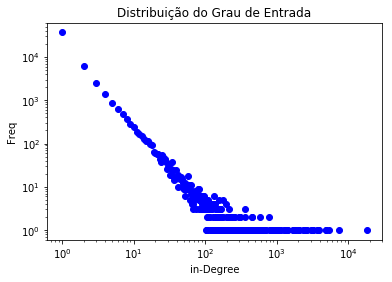

In [144]:
in_degrees = M.sum(0).A[0]
in_degree_distribution = np.bincount(in_degrees)
plot_degree_distribution(in_degree_distribution)

In [129]:
journals.find_one({'ID_J': 20})

{'ID_J': 20,
 'TITLE_J': 'Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)',
 '_id': ObjectId('5cf85c019c822c0f7c1210ec')}

In [130]:
journals.find_one({'ID_J': 175})

{'ID_J': 175,
 'TITLE_J': 'Lecture Notes in Artificial Intelligence (Subseries of Lecture Notes in Computer Science)',
 '_id': ObjectId('5cf85c019c822c0f7c121187')}

In [131]:
journals.find_one({'ID_J': 199})

{'ID_J': 199,
 'TITLE_J': 'Lecture Notes in Mathematics',
 '_id': ObjectId('5cf85c019c822c0f7c12119f')}

In [132]:
journals.find_one({'ID_J': 37})

{'ID_J': 37,
 'TITLE_J': 'Proceedings of the American Mathematical Society',
 '_id': ObjectId('5cf85c019c822c0f7c1210fd')}

In [133]:
journals.find_one({'ID_J': 480})

{'ID_J': 480,
 'TITLE_J': 'Journal of the ACM (JACM)',
 '_id': ObjectId('5cf85c019c822c0f7c1212b8')}

In [134]:
journals.find_one({'ID_J': 164})

{'ID_J': 164,
 'TITLE_J': 'Mathematische Annalen',
 '_id': ObjectId('5cf85c019c822c0f7c12117c')}

In [138]:
journals.find_one({'ID_J': 7})

{'ID_J': 7,
 'TITLE_J': 'Annals of Pure and Applied Logic',
 '_id': ObjectId('5cf85c019c822c0f7c1210df')}

In [139]:
journals.find_one({'ID_J': 6})

{'ID_J': 6,
 'TITLE_J': 'Journal of Symbolic Logic',
 '_id': ObjectId('5cf85c019c822c0f7c1210de')}

In [140]:
journals.find_one({'ID_J': 2})

{'ID_J': 2,
 'TITLE_J': 'Mathematical Logic Quarterly',
 '_id': ObjectId('5cf85c019c822c0f7c1210da')}

In [150]:
articles.find_one({'ID_J': 6})

{'AUTHORS': {'author_0': {'affiliation': ['60086543'],
   'auid': '24485760100',
   'indexed_name': 'Sabok M.'},
  'author_1': {'affiliation': ['60056159', '60013959'],
   'auid': '56018747700',
   'indexed_name': 'Zapletal J.'}},
 'CITED_BY_COUNT': 7,
 'DOI': '10.2178/jsl/1309952535',
 'ID_A': 7,
 'ID_J': 6,
 'ISSN': '00224812',
 'REFS': ['0003858275',
  '38249009155',
  '80052703037',
  '0039448532',
  '0004289448',
  '0010090836',
  '0000800116',
  '0003589707',
  '80052756183',
  '84860192451',
  '21844508474',
  '0032374565',
  '0034355877',
  '54249139813',
  '69549120371'],
 'TITLE_A': 'Forcing properties of ideals of closed sets',
 'TITLE_J': 'Journal of Symbolic Logic',
 'YEAR': '2011-09-01',
 '_id': ObjectId('5cf85c2b9c822c0f7c12dd0a')}

In [154]:
with open('pickles/' + 'INFEC-DISEASES' + '_REFS.pickle', 'rb') as f:
    [info_articles, info_journals,ref_error] = pickle.load(f)

In [155]:
len(info_articles)

90866

In [156]:
len(ref_error)

4